In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks
!pip install mediapipe

[WinError 2] The system cannot find the file specified: 'yolov5'
C:\Users\Rajat Agrawal\Desktop\Research Project\code_art


'git' is not recognized as an internal or external command,
operable program or batch file.


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


ModuleNotFoundError: No module named 'torch'

In [ ]:
!pip install dropbox

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.0/594.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
import cv2
import mediapipe as mp
import os
import numpy as np
import torch
from google.colab.patches import cv2_imshow
import zipfile
import shutil
import glob
import pandas as pd
import numpy as np
import dropbox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,BatchNormalization

In [ ]:

# Dropbox access token
access_token = "sl.BjsOuxu3ImHUHfj29UEksgPW2PinlSujvRPp3sOPr0XBC1nT4xuDW-CGGORdCS3rT8wP2YitK-aZpQdWpSaRa8xivYGDace2TN9-n_GyMqatbUKYxvdkt9lQgHomYcU0BpDXFPq3vC70_wfRlXWabTo"

# Create a Dropbox instance
dbx = dropbox.Dropbox(access_token)
dbx

In [ ]:
dropbox_folder_path="/Anomaly-Detection-Dataset"
files = dbx.files_list_folder(dropbox_folder_path)
# files

In [ ]:
try:
    response = dbx.files_list_folder(dropbox_folder_path)
    for entry in response.entries:
        # Check if the entry represents a file
        if isinstance(entry, dropbox.files.FileMetadata):
            # Extract the file name from the entry
            file_name = entry.name
            print(f"File: {file_name}")
        elif isinstance(entry, dropbox.files.FolderMetadata):
            # This is a folder entry, you can handle it here if needed
            folder_name = entry.name
            print(f"Folder: {folder_name}")
except dropbox.exceptions.AuthError as e:
    print("Error: Invalid Dropbox access token.")
except dropbox.exceptions.ApiError as e:
    print(f"Error: {e.user_message_text}")

File: Anomaly-Videos-Part-1.zip
File: Anomaly-Videos-Part-2.zip
File: Anomaly-Videos-Part-3.zip
File: Anomaly-Videos-Part-4.zip
File: Anomaly_Train.txt
File: Normal_Videos_for_Event_Recognition.zip
File: ReadMe-Anomaly-Detection.txt
File: Temporal_Anomaly_Annotation_for_Testing_Videos.txt
File: Testing_Normal_Videos.zip
File: Training-Normal-Videos-Part-1.zip
File: Training-Normal-Videos-Part-2.zip
File: UCF_Crimes-Train-Test-Split.zip


In [ ]:
# DROPBOX_ZIP_FILE_PATH="/Anomaly-Detection-Dataset/Anomaly-Videos-Part-4.zip"
# DROPBOX_ZIP_FILE_PATH="/Anomaly-Detection-Dataset/Normal_Videos_for_Event_Recognition.zip"
DESTINATION_DIRECTORY="/content"
DROPBOX_ZIP_FILE_PATH="/Anomaly-Detection-Dataset/"

def zip_upload(DROPBOX_ZIP_FILE_PATH,DESTINATION_DIRECTORY):
  try:
      _, response = dbx.files_download(DROPBOX_ZIP_FILE_PATH)

      # Save the zip file locally
      with open("temp.zip", "wb") as f:
          f.write(response.content)

      # Extract the contents of the zip file
      with zipfile.ZipFile("temp.zip", "r") as zip_ref:
          zip_ref.extractall(DESTINATION_DIRECTORY)

      print("Zip file extracted successfully.")
  except dropbox.exceptions.AuthError as e:
      print("Error: Invalid Dropbox access token.")
  except dropbox.exceptions.ApiError as e:
      print(f"Error: {e.user_message_text}")

  # Remove the temporary zip file
  import os
  os.remove("temp.zip")

zip_lst=['Anomaly-Videos-Part-1.zip','Anomaly-Videos-Part-2.zip','Anomaly-Videos-Part-3.zip','Anomaly-Videos-Part-4.zip','Normal_Videos_for_Event_Recognition.zip']
# zip_lst=['Anomaly-Videos-Part-3.zip','Anomaly-Videos-Part-4.zip','Normal_Videos_for_Event_Recognition.zip']

for i in zip_lst:
  print(DROPBOX_ZIP_FILE_PATH+i)
  zip_upload(DROPBOX_ZIP_FILE_PATH+i,DESTINATION_DIRECTORY)

/Anomaly-Detection-Dataset/Anomaly-Videos-Part-1.zip
Zip file extracted successfully.
/Anomaly-Detection-Dataset/Anomaly-Videos-Part-2.zip
Zip file extracted successfully.
/Anomaly-Detection-Dataset/Anomaly-Videos-Part-3.zip
Zip file extracted successfully.
/Anomaly-Detection-Dataset/Anomaly-Videos-Part-4.zip
Zip file extracted successfully.
/Anomaly-Detection-Dataset/Normal_Videos_for_Event_Recognition.zip
Zip file extracted successfully.


In [ ]:
# DROPBOX_TEXT_FILE_PATH="/Anomaly-Detection-Dataset/Anomaly_Train.txt"
# _, response = dbx.files_download(DROPBOX_TEXT_FILE_PATH)

# # Read the contents of the text file
# text_content = response.content.decode("utf-8")
# with open("anomaly.txt","w") as file:
#   file.write(text_content)
# text_content

In [ ]:
import shutil
import os
# Specify the source and destination paths for the files you want to move
move_lst=['Anomaly-Videos-Part-1/','Anomaly-Videos-Part-2/','Anomaly-Videos-Part-3/','Anomaly-Videos-Part-4/','Normal_Videos_for_Event_Recognition/']
# SOURCE_FILE_PATH = "/content/Anomaly-Videos-Part-1/*"
DESTINATION_FOLDER_PATH = "/content/Anomaly_Videos/"

# Specify the source and destination folder paths
SOURCE_FOLDER_PATH = "/content/"
# DESTINATION_FOLDER_PATH = "/content/destination_folder/"

# Create the destination folder if it doesn't exist
if not os.path.exists(DESTINATION_FOLDER_PATH):
    os.makedirs(DESTINATION_FOLDER_PATH)

# Move all contents of the source folder to the destination folder
for i in move_lst:
  print(SOURCE_FOLDER_PATH+i)
  SOURCE_FOLDER_PATH_=SOURCE_FOLDER_PATH+i
  for item in os.listdir(SOURCE_FOLDER_PATH_):
      source_item_path = os.path.join(SOURCE_FOLDER_PATH_, item)
      destination_item_path = os.path.join(DESTINATION_FOLDER_PATH, item)

      # Use shutil.move to move the item to the destination folder
      shutil.move(source_item_path, destination_item_path)


/content/Anomaly-Videos-Part-1/
/content/Anomaly-Videos-Part-2/
/content/Anomaly-Videos-Part-3/
/content/Anomaly-Videos-Part-4/
/content/Normal_Videos_for_Event_Recognition/


In [ ]:
# # Specify the source and destination folder paths
# SOURCE_FOLDER_PATH = "/content/Normal_Videos_for_Event_Recognition/"
# DESTINATION_FOLDER_PATH = "/content/Training_Normal_Videos_Anomaly/"

# # Create the destination folder if it doesn't exist
# CURRENT_FOLDER_PATH = "/content/Normal_Videos_for_Event_Recognition/"
# NEW_FOLDER_NAME = "Training_Normal_Videos_Anomaly"

# # Rename the folder
# os.rename(CURRENT_FOLDER_PATH, os.path.join("/content", NEW_FOLDER_NAME))

# print("Folder name changed successfully.")

In [ ]:
# os.listdir("/content/Anomaly_Videos")

In [ ]:
normal_lst= glob.glob("/content/Anomaly_Videos/Normal*")
normal_lst

['/content/Anomaly_Videos/Normal_Videos_365_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_015_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_312_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_360_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_913_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_881_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_745_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_603_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_929_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_452_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_656_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_892_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_417_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_352_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_641_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_401_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_248_x264.mp4',
 '/content/Anomaly_Videos/Normal_Videos_905_x264.mp4',
 '/content

In [ ]:
DESTINATION_FOLDER_PATH='/content/Anomaly_Videos/Normal'
if not os.path.exists(DESTINATION_FOLDER_PATH):
    os.makedirs(DESTINATION_FOLDER_PATH)
for i in normal_lst:
  # print(i)
  shutil.move(i, DESTINATION_FOLDER_PATH)


In [ ]:
os.listdir("/content/Anomaly_Videos")

['Assault',
 'Vandalism',
 'Robbery',
 'RoadAccidents',
 'Stealing',
 'Burglary',
 'Normal',
 'Explosion',
 'Arrest',
 'Arson',
 'Shoplifting',
 'Fighting',
 'Abuse',
 'Shooting']

In [ ]:
class_vid_lst=glob.glob("/content/Anomaly_Videos/*")
# class_vid_lst
class_vid_lst=[ x for x in class_vid_lst if "yolo" not in x and "zip" not in x ]
class_vid_lst

['/content/Anomaly_Videos/Assault',
 '/content/Anomaly_Videos/Vandalism',
 '/content/Anomaly_Videos/Robbery',
 '/content/Anomaly_Videos/RoadAccidents',
 '/content/Anomaly_Videos/Stealing',
 '/content/Anomaly_Videos/Burglary',
 '/content/Anomaly_Videos/Normal',
 '/content/Anomaly_Videos/Explosion',
 '/content/Anomaly_Videos/Arrest',
 '/content/Anomaly_Videos/Arson',
 '/content/Anomaly_Videos/Shoplifting',
 '/content/Anomaly_Videos/Fighting',
 '/content/Anomaly_Videos/Abuse',
 '/content/Anomaly_Videos/Shooting']

In [ ]:
for class_vid in class_vid_lst:
  video_paths=glob.glob(class_vid+"/*")
  video_paths=video_paths[:2]
  print(video_paths)

['/content/Anomaly_Videos/Assault/Assault041_x264.mp4', '/content/Anomaly_Videos/Assault/Assault050_x264.mp4']
['/content/Anomaly_Videos/Vandalism/Vandalism035_x264.mp4', '/content/Anomaly_Videos/Vandalism/Vandalism009_x264.mp4']
['/content/Anomaly_Videos/Robbery/Robbery022_x264.mp4', '/content/Anomaly_Videos/Robbery/Robbery001_x264.mp4']
['/content/Anomaly_Videos/RoadAccidents/RoadAccidents026_x264.mp4', '/content/Anomaly_Videos/RoadAccidents/RoadAccidents083_x264.mp4']
['/content/Anomaly_Videos/Stealing/Stealing070_x264.mp4', '/content/Anomaly_Videos/Stealing/Stealing112_x264.mp4']
['/content/Anomaly_Videos/Burglary/Burglary060_x264.mp4', '/content/Anomaly_Videos/Burglary/Burglary003_x264.mp4']
['/content/Anomaly_Videos/Normal/Normal_Videos_365_x264.mp4', '/content/Anomaly_Videos/Normal/Normal_Videos_015_x264.mp4']
['/content/Anomaly_Videos/Explosion/Explosion016_x264.mp4', '/content/Anomaly_Videos/Explosion/Explosion004_x264.mp4']
['/content/Anomaly_Videos/Arrest/Arrest044_x264.mp4'

In [ ]:
video_paths

['/content/Anomaly_Videos/Shooting/Shooting050_x264.mp4',
 '/content/Anomaly_Videos/Shooting/Shooting022_x264.mp4']

In [ ]:
# import cv2

# def get_video_properties(video_file):
#     try:
#         cap = cv2.VideoCapture(video_file)
#         if not cap.isOpened():
#             raise Exception(f"Error opening {video_file}")

#         # Get the frame rate (FPS)
#         frame_rate = cap.get(cv2.CAP_PROP_FPS)

#         # Get the duration (in seconds)
#         frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#         fps = int(frame_rate)
#         duration = frame_count // fps

#         return duration, frame_rate
#     except Exception as e:
#         print(f"Error occurred while processing {video_file}: {e}")
#         return None, None
#     finally:
#         cap.release()

# # List of video files
# # video_list = ["video1.mp4", "video2.mp4", "video3.mp4"]

# for video_file in video_paths:
#     duration, frame_rate = get_video_properties(video_file)
#     if duration is not None and frame_rate is not None:
#         print(f"Video: {video_file}")
#         print(f"Duration: {duration} seconds")
#         print(f"Frame rate: {frame_rate} FPS")
#         print("----------------------")


In [ ]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)  # yolov5n - yolov5x6 or custom

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-203-g0897415 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:00<00:00, 18.2MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
class_vid_lst

['/content/Anomaly_Videos/Assault',
 '/content/Anomaly_Videos/Vandalism',
 '/content/Anomaly_Videos/Robbery',
 '/content/Anomaly_Videos/RoadAccidents',
 '/content/Anomaly_Videos/Stealing',
 '/content/Anomaly_Videos/Burglary',
 '/content/Anomaly_Videos/Normal',
 '/content/Anomaly_Videos/Explosion',
 '/content/Anomaly_Videos/Arrest',
 '/content/Anomaly_Videos/Arson',
 '/content/Anomaly_Videos/Shoplifting',
 '/content/Anomaly_Videos/Fighting',
 '/content/Anomaly_Videos/Abuse',
 '/content/Anomaly_Videos/Shooting']

In [ ]:
import gc
if  os.path.exists("/content/yolov5/runs/detect/exp"):
  shutil.rmtree("/content/yolov5/runs/detect/exp")

In [ ]:
master_df=pd.DataFrame()
for class_vid in class_vid_lst:
  video_paths=glob.glob(class_vid+"/*")
  # video_paths=video_paths[:2]
  print(video_paths)
  master_dict = {}
  step=8
  frame_count =0
  for video_path in video_paths:
      cap = cv2.VideoCapture(video_path)
      frame_rate = cap.get(cv2.CAP_PROP_FPS)

      # Get the duration (in seconds)
      frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
      fps = int(frame_rate)
      duration = frame_count // fps
      print(duration,fps)
      with mp_pose.Pose() as pose:
          video_dict = {}
          while cap.isOpened():
              success, frame = cap.read()
              if not success:
                  break
              frame_count += 1
              if frame_count % step == 0:
                results = model(frame)
                print(results)
                results.crop()
                lst=glob.glob("/content/yolov5/runs/detect/exp/crops/person/*")
                print(lst)
                count=0
                for i in lst:
                    count=count+1
                    i=cv2.imread(i)
                    frame_rgb = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
                    results = pose.process(frame_rgb)
                    if results.pose_landmarks:
                        landmarks = results.pose_landmarks.landmark
                        keypoints = np.array([(lm.x, lm.y) for lm in landmarks])
                        shoulder_distance = np.linalg.norm(keypoints[mp_pose.PoseLandmark.LEFT_SHOULDER.value] - keypoints[mp_pose.PoseLandmark.RIGHT_SHOULDER.value])
                        elbow_distance = np.linalg.norm(keypoints[mp_pose.PoseLandmark.LEFT_ELBOW.value] - keypoints[mp_pose.PoseLandmark.RIGHT_ELBOW.value])

                        shoulder_angle = np.arctan2(keypoints[mp_pose.PoseLandmark.LEFT_SHOULDER.value, 1] - keypoints[mp_pose.PoseLandmark.RIGHT_SHOULDER.value, 1],
                                                    keypoints[mp_pose.PoseLandmark.LEFT_SHOULDER.value, 0] - keypoints[mp_pose.PoseLandmark.RIGHT_SHOULDER.value, 0])

                        arm_to_height_ratio = elbow_distance / (keypoints[mp_pose.PoseLandmark.LEFT_HIP.value, 1] - keypoints[mp_pose.PoseLandmark.RIGHT_HIP.value, 1])

                        frame_number = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
                        frame_features = {
                            "shoulder_distance": shoulder_distance,
                            "elbow_distance": elbow_distance,
                            "shoulder_angle": shoulder_angle,
                            "arm_to_height_ratio": arm_to_height_ratio,
                            "Person_number" : count,
                            "Video_path" :video_path
                        }
                        video_dict[frame_number] = frame_features
                        del results,frame_rgb,landmarks,keypoints,shoulder_distance,elbow_distance,shoulder_angle,arm_to_height_ratio,frame_number
                        # video_dict["Person "+str(count)]=frame_features
                        gc.collect()

                master_dict[video_path] = video_dict
                print("-")
                if os.path.exists("/content/yolov5/runs/detect/exp"):
                  shutil.rmtree("/content/yolov5/runs/detect/exp")
                gc.collect()
      cap.release()
  rows = []
  for video_path, frame_data in master_dict.items():
      for frame_number, frame_info in frame_data.items():
          row = {'Video_path': video_path, 'Frame_number': frame_number}
          row.update(frame_info)
          rows.append(row)
  feature_df=pd.DataFrame()
  # Create the DataFrame
  feature_df = pd.DataFrame(rows)
  master_df=master_df.append(feature_df)
  # Display the DataFrame
  # print(df)

['/content/Anomaly_Videos/Assault/Assault041_x264.mp4', '/content/Anomaly_Videos/Assault/Assault050_x264.mp4', '/content/Anomaly_Videos/Assault/Assault016_x264.mp4', '/content/Anomaly_Videos/Assault/Assault030_x264.mp4', '/content/Anomaly_Videos/Assault/Assault029_x264.mp4', '/content/Anomaly_Videos/Assault/Assault013_x264.mp4', '/content/Anomaly_Videos/Assault/Assault005_x264.mp4', '/content/Anomaly_Videos/Assault/Assault014_x264.mp4', '/content/Anomaly_Videos/Assault/Assault027_x264.mp4', '/content/Anomaly_Videos/Assault/Assault015_x264.mp4', '/content/Anomaly_Videos/Assault/Assault032_x264.mp4', '/content/Anomaly_Videos/Assault/Assault033_x264.mp4', '/content/Anomaly_Videos/Assault/Assault046_x264.mp4', '/content/Anomaly_Videos/Assault/Assault017_x264.mp4', '/content/Anomaly_Videos/Assault/Assault035_x264.mp4', '/content/Anomaly_Videos/Assault/Assault023_x264.mp4', '/content/Anomaly_Videos/Assault/Assault006_x264.mp4', '/content/Anomaly_Videos/Assault/Assault024_x264.mp4', '/content

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 1 potted plant, 1 book
Speed: 33.1ms pre-process, 88.3ms inference, 45.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 3.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 cup, 1 potted plant, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 cup, 2 potted plants, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 cup, 2 potted plants, 1 book
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 cup, 1 potted plant, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 potted plants, 1 tv, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 potted plants, 1 tv, 1 laptop
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 potted plants, 1 tv, 1 laptop
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 laptop
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 couch, 1 potted plant, 1 laptop
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 couch, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 couch, 1 potted plant, 1 laptop
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 couch, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 potted plants
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 couch, 1 potted plant
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 couch, 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 backpack, 1 potted plant
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 potted plants
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 potted plants
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 couch, 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 couch, 1 potted plant, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 couch, 1 potted plant, 1 laptop, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 laptop, 2 books
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 potted plants, 1 laptop, 1 keyboard, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 laptop, 1 keyboard, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 potted plants, 1 laptop, 1 keyboard, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 potted plants, 2 tvs, 1 laptop, 1 keyboard, 2 books
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 potted plants, 2 tvs, 1 laptop, 1 keyboard, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 2 potted plants, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 2 potted plants, 2 tvs, 1 laptop, 1 keyboard, 3 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 2 potted plants, 2 tvs, 1 laptop, 1 keyboard, 3 books
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 couch, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 couch, 1 potted plant, 2 tvs, 1 laptop, 2 books
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 couch, 1 potted plant, 2 tvs, 1 laptop, 2 books
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 couch, 1 potted plant, 2 tvs, 1 laptop, 1 keyboard, 2 books
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 2 tvs, 1 laptop, 2 books
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 2 tvs, 1 laptop, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 2 tvs, 1 laptop, 2 books
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 couch, 2 potted plants, 2 tvs, 1 laptop, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 couch, 2 potted plants, 2 tvs, 1 laptop, 1 keyboard, 2 books
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 couch, 2 potted plants, 2 tvs, 1 laptop, 1 keyboard, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 couch, 1 potted plant, 2 tvs, 1 laptop, 2 books
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 couch, 2 potted plants, 1 tv, 1 laptop, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 2 potted plants, 2 tvs, 1 laptop, 1 keyboard, 2 books
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 2 books
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 2 books
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 laptop, 1 keyboard, 3 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 backpack, 1 chair, 1 potted plant, 2 tvs, 1 laptop, 1 keyboard, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 backpack, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 3 books
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 tv, 1 keyboard, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 tv, 1 keyboard, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant, 1 tv, 1 keyboard, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 2 books
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 1 book
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 laptop, 1 book
Speed: 3.1ms pre-process, 10.9ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 1 truck, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck, 2 potted plants, 2 tvs, 1 laptop, 1 mouse, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 2 potted plants, 1 tv, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 potted plants, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 2 potted plants, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 potted plants, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 potted plants, 1 tv, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck, 1 potted plant, 1 laptop
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 chairs, 1 couch, 1 potted plant, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop, 2 books
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop, 2 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop, 2 books
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop, 2 books
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 remote, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 book
Speed: 2.5ms pre-process, 9.9ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bottle, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 couch, 1 potted plant, 1 laptop, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 2 tvs, 1 laptop
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 chairs, 1 potted plant, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 2 tvs, 1 laptop, 2 books
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 couch, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 2 tvs, 1 laptop
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 2 tvs, 1 laptop, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 2 tvs, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 2 tvs, 1 laptop, 1 keyboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 2 tvs, 1 laptop
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 laptop, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck, 1 potted plant, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 truck, 1 potted plant, 1 laptop
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 truck, 1 potted plant, 1 tv, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 chairs, 1 potted plant, 1 tv, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant, 1 laptop
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck, 1 chair, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck, 1 potted plant, 1 tv
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 potted plant, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 2 keyboards
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 keyboard, 1 book
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 potted plants, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 backpack, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 potted plant, 1 laptop
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant, 1 laptop
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 couch, 1 potted plant, 1 tv, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 potted plant, 1 laptop
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 potted plants, 1 tv, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 potted plants, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 potted plants, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 potted plants, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 potted plant, 1 laptop
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 laptop
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 potted plants, 1 tv, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 mouse, 1 keyboard, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 couch, 1 potted plant, 1 tv, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 couch, 1 potted plant, 1 tv, 1 laptop
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 couch, 1 potted plant, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 couch, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 backpack, 1 potted plant, 1 tv, 1 laptop
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 tv, 1 laptop
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 2 potted plants, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 2 potted plants, 3 tvs, 1 laptop, 2 books
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 2 potted plants, 2 tvs, 1 laptop, 2 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 2 potted plants, 1 tv, 1 laptop, 3 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 2 potted plants, 1 tv, 1 laptop, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 3 tvs, 1 laptop, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 2 tvs, 1 laptop, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 2 tvs, 1 laptop, 3 books
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 laptop, 1 keyboard, 3 books
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 3 books
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop, 3 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop, 3 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 3 books
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 3 books
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant, 1 tv, 1 laptop, 3 books
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 3 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 couch, 1 potted plant, 1 laptop, 4 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 3 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 2 tvs, 1 laptop, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 2 tvs, 1 laptop, 2 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 2 tvs, 1 laptop, 2 books
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 3 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 2 keyboards, 2 books
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 3 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 2 tvs, 1 laptop, 2 books
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 2 tvs, 1 laptop, 1 keyboard, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 2 tvs, 1 laptop, 1 keyboard, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 2 tvs, 1 laptop, 1 keyboard, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 2 tvs, 1 laptop, 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 2 tvs, 1 laptop, 1 keyboard, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 laptop, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 2 tvs, 1 laptop, 3 books
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 backpack, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck, 1 potted plant, 1 tv, 1 laptop, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop
Speed: 3.0ms pre-process, 10.0ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 tv, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 2 tvs, 1 laptop
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck, 1 potted plant
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck, 1 potted plant
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck, 1 potted plant
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck, 1 potted plant
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck, 1 potted plant
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair, 1 potted plant, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.5ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 2 potted plants, 1 laptop, 2 books
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 2 potted plants, 1 tv, 1 laptop, 2 books
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 backpack, 1 chair, 2 potted plants, 1 tv, 1 laptop, 2 books
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 backpack, 1 chair, 1 potted plant, 1 tv, 1 laptop, 3 books
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 2 books
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 chairs, 1 potted plant, 1 laptop, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 chairs, 2 potted plants, 1 laptop, 1 keyboard, 2 books
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 chairs, 2 potted plants, 1 laptop, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 potted plant, 1 laptop, 1 keyboard, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 2 books
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 chairs, 1 potted plant, 1 laptop, 3 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 mouse, 2 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 mouse, 1 keyboard, 2 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 mouse, 1 keyboard, 2 books
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 1 cell phone, 1 book
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 laptop, 1 keyboard, 1 book
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 1 book
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 laptop, 1 remote, 1 keyboard, 3 books
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 laptop, 1 remote, 1 keyboard, 2 books
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 remote, 1 keyboard, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 1 book
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 laptop, 1 keyboard, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 laptop, 1 keyboard, 1 cell phone, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 laptop, 1 keyboard, 2 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 couch, 1 potted plant, 1 laptop, 1 keyboard, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 couch, 1 potted plant, 1 laptop, 1 keyboard, 3 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 couch, 1 potted plant, 1 laptop, 1 keyboard, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 1 cell phone, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 2 books
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 remote, 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 remote, 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 3 books
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 3 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 3 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 laptop, 1 keyboard, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 microwave
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 remote, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 chair, 1 potted plant, 1 tv, 1 keyboard, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.1ms pre-process, 9.5ms inference, 3.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant, 1 tv, 1 laptop, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant, 2 tvs, 1 laptop, 1 keyboard, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 tv, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 chair, 1 tv, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 tv, 1 laptop, 1 remote, 1 keyboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 tv, 1 laptop, 1 remote, 1 keyboard
Speed: 2.8ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 laptop, 1 mouse, 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 potted plant, 1 laptop, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 train, 1 backpack
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 train, 1 backpack
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 backpack
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 train
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 train, 1 bird
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 train, 1 bird
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 train, 1 bird
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 train
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 handbags
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



20 30
image 1/1: 240x320 1 person
Speed: 4.9ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 2.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.8ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 10.4ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 1 teddy bear
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 teddy bear
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 teddy bear
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.9ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.8ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.8ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 3.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 teddy bear
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 teddy bear
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 teddy bear
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



220 30
image 1/1: 240x320 1 apple
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 11.3ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs, 1 tv, 1 cell phone
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs, 2 tvs, 1 cell phone
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 3 chairs, 2 tvs, 1 cell phone
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 2 tvs, 1 cell phone
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 laptop, 1 cell phone
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 laptop
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 2 tvs, 1 laptop
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs
Speed: 2.7ms pre-process, 9.8ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 2.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs, 1 cell phone, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs, 1 cell phone
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 2 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair, 1 cell phone, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cell phone
Speed: 2.8ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair, 1 cell phone, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 2 tvs, 1 cell phone
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 toilet
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 2 tvs
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.7ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 2 tvs
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 keyboard
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 3 tvs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair, 1 tv
Speed: 2.3ms pre-process, 11.0ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 2 tvs
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv
Speed: 2.4ms pre-process, 11.0ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 oven, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 oven, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 10.9ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 cell phone, 1 book
Speed: 2.8ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 oven
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 cell phone
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 cell phone, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 apple, 1 tv, 1 cell phone, 1 oven
Speed: 2.4ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 cell phone, 1 oven, 1 book
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 cell phone, 1 oven
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 tv, 1 cell phone
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bottle, 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair, 1 potted plant, 1 cell phone, 1 book
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 cell phone
Speed: 2.9ms pre-process, 9.7ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair, 1 laptop, 1 cell phone
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 donut, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 orange, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 apple, 1 chair, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 cell phone
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tv
Speed: 2.7ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 tvs, 1 cell phone
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 2 tvs, 1 cell phone
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 tvs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 tvs
Speed: 2.7ms pre-process, 10.3ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 tvs
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 2 tvs
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 tvs
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tv
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 tv
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 2 tvs
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 1 apple
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 cell phone
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 cell phone, 1 oven, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 tv, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 book
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 10.2ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 oven
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair, 1 tv, 1 oven
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 oven
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 cell phone
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.8ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 3.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 apple, 1 chair, 1 cell phone
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 apple, 1 chair, 1 cell phone
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 suitcase, 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 3.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 10.0ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.4ms pre-process, 9.6ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bottle, 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 3.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bottle, 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 3.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 1 apple, 1 chair, 1 cell phone
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.9ms pre-process, 9.6ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 keyboard
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 oven
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 cell phone
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 cell phone
Speed: 3.0ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 cell phone
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.9ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.8ms pre-process, 11.2ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 oven
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.2ms pre-process, 9.6ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 suitcase, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.8ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.6ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 2 tvs
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv, 1 oven
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv, 1 cell phone, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.5ms pre-process, 10.3ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.5ms inference, 2.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 cup, 1 apple, 1 chair, 1 tv, 1 cell phone, 1 oven
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 oven
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 2 tvs, 1 oven
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 2 tvs, 1 oven
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 cell phone, 1 oven
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv, 1 cell phone, 1 oven
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 apple, 1 chair
Speed: 3.0ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 cell phone
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 cell phone
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 cell phone, 1 oven
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone, 1 oven
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 cell phone
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 15.2ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 orange, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 oven
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 tv, 1 oven
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 oven
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.8ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.7ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 cell phone
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 cell phone
Speed: 2.8ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 cell phone
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 oven
Speed: 2.4ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 oven
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.6ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 10.0ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 cell phone
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 cell phone, 1 oven
Speed: 2.9ms pre-process, 9.7ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 cell phone, 1 oven
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 oven, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv, 1 cell phone
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 cell phone
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 oven
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tie, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 10.2ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv, 1 oven
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.6ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv, 1 oven
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 cell phone, 1 oven
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 cell phone
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 cell phone, 1 oven
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 3.0ms pre-process, 10.4ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 cell phone
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 cell phone, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv, 1 oven
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 oven
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 oven
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 oven
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair, 1 oven
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bottle, 1 apple, 1 chair, 1 oven
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair, 1 oven
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 cell phone
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 10.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv, 1 oven
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 3.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair, 1 oven
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 apple, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



58 30
image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.7ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 traffic light
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.8ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 10.3ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 skateboard
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.8ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



20 30
image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bear
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.8ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bear
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bear
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 1 bear
Speed: 2.4ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.8ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bear
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bear
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bear
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bear
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bear
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog, 1 bear
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog, 1 bear
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cat
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bear
Speed: 2.4ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 10.1ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat
Speed: 2.4ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 3.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



79 30
image 1/1: 240x320 4 persons, 2 cups, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 cup, 2 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 cup, 2 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 2 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cups, 5 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cups, 3 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cups, 3 chairs
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cups, 4 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 3 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 2 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cups, 3 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 2 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cups, 1 chair, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cups, 1 bowl, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 cups, 1 chair
Speed: 2.5ms pre-process, 9.7ms inference, 2.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 scissors
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cups, 1 chair, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cups, 1 chair, 1 book
Speed: 2.8ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cups, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 chairs, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 chairs, 1 book
Speed: 2.5ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 chairs, 1 book
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 1 bowl, 3 chairs, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 2 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cups, 1 chair, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 3 chairs
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cups, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 3 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cups, 1 chair, 1 cell phone
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 cups, 2 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 3 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 3 chairs
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bowl, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 cup, 3 bowls, 1 chair, 1 dining table
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 cups, 3 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cups, 3 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup, 3 chairs
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cups, 3 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 2 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 cup, 3 chairs, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 3 chairs, 2 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 3 chairs
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 chairs, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 chairs
Speed: 2.8ms pre-process, 10.3ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 cup, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.8ms pre-process, 9.8ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 cup
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 cup
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 remote
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 cups, 2 bowls
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 cups
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 1 cup, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 cup, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bowl
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 remote
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bowl, 2 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bowl
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book, 1 scissors
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 mouse
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 mouse, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 1 mouse, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse, 1 remote, 1 book
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 chairs, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 chair, 1 mouse, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 mouse, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 mouse, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 cups, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 mouse, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 1 mouse, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 cup, 1 mouse
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 mouse
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 1 mouse, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 mouse, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 mouse, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 mouse, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 mouse, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 mouse, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 mouse, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 mouse, 1 book
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 1 mouse, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 1 mouse, 1 book
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 1 book
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cow, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 mouse, 1 book
Speed: 3.0ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 1 mouse, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 cup, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 mouse, 1 book, 1 teddy bear
Speed: 2.4ms pre-process, 11.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 mouse, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 mouse, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 1 chair, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 1 book
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 motorcycle, 1 cup, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 cup, 1 chair, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 1 chair, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 chairs, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 book
Speed: 2.4ms pre-process, 9.8ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 remote, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 2 chairs, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 chair, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 backpack, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 1 book
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 chair, 1 cell phone, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bicycles, 1 remote, 1 cell phone, 1 book
Speed: 3.1ms pre-process, 9.8ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair, 1 remote, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair, 1 cell phone, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cell phone, 1 book
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cell phone, 1 book
Speed: 2.1ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 2.2ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 cell phone, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 cell phone, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone, 1 book
Speed: 2.9ms pre-process, 9.7ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 chairs, 1 cell phone, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cell phone, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cell phone, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 chairs, 1 mouse, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 chairs, 1 mouse, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 chairs, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 chairs, 1 book, 1 teddy bear
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 mouse, 1 book, 1 teddy bear
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 chairs, 1 book
Speed: 2.8ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 chairs, 1 book, 1 teddy bear
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 book
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup, 1 chair, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 chairs, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 chairs, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 chairs, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 chairs, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 3 chairs, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup, 3 chairs, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 chairs, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 chairs, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 chairs, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup, 3 chairs, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 chairs, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 chairs, 1 book
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cups, 2 chairs, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 chairs, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 1 book
Speed: 2.1ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 chairs, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 2 chairs, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup, 2 chairs, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 chairs, 1 cell phone, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 3 chairs, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 chairs, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 cup, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 book
Speed: 2.4ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog, 1 chair, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 chairs, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 chairs, 1 book
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 chairs, 1 laptop, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bowls, 3 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bowls, 4 chairs
Speed: 2.6ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bowl, 3 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 elephant, 3 chairs, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 dogs, 3 chairs, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 elephant, 3 chairs, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 bowl, 3 chairs, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 bowl, 3 chairs, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 bowl, 3 chairs, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 1 cup, 2 bowls, 3 chairs, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 1 bowl, 2 chairs, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog, 1 cup, 1 bowl, 1 book
Speed: 3.0ms pre-process, 10.0ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 bowls, 3 chairs, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog, 2 cups, 3 chairs, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 2 bowls, 1 chair, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bowls, 2 chairs, 1 book
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bowls, 3 chairs, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bowls, 3 chairs, 1 book
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bowls, 4 chairs, 1 cell phone
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bowl, 5 chairs, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bowl, 5 chairs, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bowl, 3 chairs, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bowl, 3 chairs, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bowl, 3 chairs, 1 book, 1 teddy bear
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bowl, 4 chairs, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bowl, 2 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bowl, 2 chairs, 1 book, 1 teddy bear
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bowl, 2 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



40 30
image 1/1: 240x320 1 sheep
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 fire hydrant
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 sheep
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 11.3ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 fire hydrant
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 fire hydrant, 1 sheep
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 fire hydrant
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 fire hydrant
Speed: 2.6ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.7ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.8ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 fire hydrant
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 fire hydrant
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 fire hydrant
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 fire hydrant
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 10.2ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.8ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 fire hydrant
Speed: 2.4ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bear
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 sheep
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 10.7ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.8ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bear
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.8ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



63 30
image 1/1: 240x320 4 persons, 1 car, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 3.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 10.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 trucks
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 trucks
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 trucks
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 trucks
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 trucks
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 trucks
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 3.0ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 3.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck, 1 suitcase, 1 clock
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck, 1 clock
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck, 1 clock
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck, 1 clock
Speed: 2.7ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck, 1 boat
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 3.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck, 1 clock
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck, 1 clock
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 clock
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck, 1 clock
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck, 1 boat
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck, 1 boat
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.8ms pre-process, 11.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck, 1 skis
Speed: 2.8ms pre-process, 10.4ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck, 1 skis
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck, 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 truck, 1 dog
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 umbrella
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck, 1 boat
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 clock
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 truck, 1 clock
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 truck, 1 boat, 1 clock
Speed: 2.1ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 truck, 1 boat
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 truck, 1 boat
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 backpack, 1 clock
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 truck, 1 boat, 1 clock
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck, 1 backpack
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.1ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck
Speed: 2.6ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 backpack
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck, 1 backpack
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck, 1 backpack
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck, 1 backpack
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 truck, 1 backpack
Speed: 2.1ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 truck, 1 backpack
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



231 30
image 1/1: 240x320 (no detections)
Speed: 3.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 11.1ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.7ms pre-process, 9.6ms inference, 3.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 10.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.8ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.9ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 10.4ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 11.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 10.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 10.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 3.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 3.0ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.7ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.7ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.7ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.7ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 motorcycle
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.9ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.8ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 10.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag, 1 potted plant
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.7ms pre-process, 10.0ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 handbag
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 handbag
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 handbag
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 1 handbag
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 handbags
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 handbags
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 2 handbags
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 handbags
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag, 1 potted plant
Speed: 2.5ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack, 1 handbag
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cell phone
Speed: 2.5ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cell phone
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.9ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag, 1 potted plant
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 10.2ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 3.0ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.8ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.3ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.9ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 3.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack, 1 potted plant
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 handbags
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 handbags
Speed: 2.8ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 handbags
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 potted plant
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag, 1 laptop
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 handbags
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 laptop
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 laptop
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 laptop
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 laptop
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 handbags
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 motorcycle, 1 handbag
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag, 1 laptop
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 laptop
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 potted plant
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 3.0ms pre-process, 10.1ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 laptop
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 10.4ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 laptop
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 laptop
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 potted plant
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 laptop
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 handbags
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 handbags
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 handbags
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag, 1 laptop
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 3.0ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.8ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack, 1 laptop
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 laptop
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag, 1 laptop
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 laptop
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 laptop
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 motorcycle, 1 handbag
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 motorcycle
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.5ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.7ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 traffic light
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 10.5ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cell phone
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 10.0ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



49 30
image 1/1: 240x320 1 person, 1 book
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat, 1 teddy bear
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cell phone
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cell phone, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.3ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.6ms pre-process, 9.8ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.7ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.9ms pre-process, 9.7ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.4ms pre-process, 9.5ms inference, 3.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.9ms pre-process, 10.2ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup, 1 potted plant
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.0ms pre-process, 9.9ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cake
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cake
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 umbrella, 1 cup
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 umbrella, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cup
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.5ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.6ms pre-process, 10.4ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



19 30
image 1/1: 240x320 1 person, 2 cars, 1 suitcase
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 suitcase
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 fire hydrant, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 fire hydrant, 1 parking meter, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 suitcase
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 fire hydrant, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 traffic light, 1 suitcase
Speed: 2.5ms pre-process, 9.5ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 fire hydrant, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 suitcase
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 parking meter, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 parking meter, 1 suitcase
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 suitcase
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 parking meter, 1 suitcase
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 suitcase
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 suitcase
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 suitcase
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 parking meter, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 suitcase
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 dog, 1 suitcase
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 suitcase
Speed: 2.3ms pre-process, 9.5ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 suitcase
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 suitcase
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 3.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 dog, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 dog, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 fire hydrant, 1 suitcase, 1 teddy bear
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 fire hydrant, 1 suitcase, 1 teddy bear
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 suitcase
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 suitcase
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 dog, 1 suitcase
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 dog, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 dog, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 dog, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 dog, 1 suitcase
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 suitcase
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 fire hydrant, 1 suitcase, 1 teddy bear
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 suitcase, 1 teddy bear
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 suitcase
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



42 30
image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.2ms pre-process, 9.5ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 traffic light
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.8ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.7ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 11.2ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 tvs
Speed: 2.2ms pre-process, 9.5ms inference, 3.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 10.1ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 traffic light
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.4ms pre-process, 9.5ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cell phone
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 boat
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 traffic light
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.7ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 traffic light
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.0ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 3.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



31 30
image 1/1: 240x320 1 person
Speed: 3.2ms pre-process, 9.9ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bird
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 10.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cat
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 dogs
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 2 dogs
Speed: 2.6ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 1 dog
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat
Speed: 2.8ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cat
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



81 30
image 1/1: 240x320 2 cars
Speed: 3.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.9ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 3.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle, 1 cat
Speed: 3.1ms pre-process, 10.3ms inference, 3.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 cat
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 cat
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 cat
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 motorcycle
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle
Speed: 3.2ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.6ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 motorcycle
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.6ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 umbrella
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 3.0ms pre-process, 10.2ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 motorcycle, 1 clock
Speed: 2.8ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.9ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.9ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 clock
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 clock
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 3.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 10.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 11.4ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 10.2ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle, 1 clock
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 clock
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 clock
Speed: 2.6ms pre-process, 9.6ms inference, 3.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 clock
Speed: 2.6ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



29 30
image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car, 1 handbag
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 skateboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 skateboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 skateboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 skateboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.9ms pre-process, 10.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 elephant
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 elephant
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 parking meter
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.8ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



33 30
image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 clock
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 clock
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 clock
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 clock
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 clock
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.9ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 bus
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 bus
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 bus
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 bus
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars, 1 bus
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars, 1 bus
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars, 1 bus
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars, 2 buss
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 bus
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 2 buss
Speed: 3.1ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 bus
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 bus
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 bus
Speed: 2.3ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 bus
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bus
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bus
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bus
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 bus
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 bus
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 bus
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 buss
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 buss
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 buss
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 bus
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 bus
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 bus
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 bus
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 banana
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bus
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 bus
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 bus
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 bus
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 buss
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 buss
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 bus
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.9ms pre-process, 11.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



269 30
image 1/1: 240x320 (no detections)
Speed: 3.0ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 refrigerator
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 refrigerator
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 refrigerator
Speed: 2.9ms pre-process, 9.7ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 tv, 1 vase
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 3.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 refrigerator
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.3ms pre-process, 9.6ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 refrigerator
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.5ms pre-process, 10.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 refrigerator
Speed: 2.4ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv, 1 refrigerator
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 10.0ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 tv
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv, 1 vase
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 microwave
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv, 1 microwave, 1 vase
Speed: 2.9ms pre-process, 9.8ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 microwave, 1 vase
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 horse, 1 backpack, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 tv
Speed: 2.3ms pre-process, 10.3ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 tv
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 microwave, 1 sink
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 microwave, 1 vase
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 3.0ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 refrigerator
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 vase
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.6ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 toilet, 1 tv, 1 remote
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.7ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.7ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 vase
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 1 vase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 dogs, 1 tv, 1 vase
Speed: 3.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv, 1 book, 1 vase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv, 1 remote
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 vase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.7ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 1 book
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tie
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tie
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 zebra
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 1 zebra
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 1 zebra
Speed: 3.2ms pre-process, 10.0ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 vase
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cup, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tv, 1 cell phone
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 10.2ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 skateboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 zebra
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 remote
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bottle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 remote
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 refrigerator
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 10.1ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cell phone
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cell phone
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog, 1 remote
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cell phone
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 horse, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 wine glass
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 snowboard, 1 skateboard
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 laptop
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 3.0ms pre-process, 10.5ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 remote
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 backpack
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.5ms inference, 4.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 1 cell phone
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 surfboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog, 1 tv
Speed: 3.0ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv, 1 microwave
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 1 tv, 1 microwave
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv, 1 refrigerator
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 vase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 skateboard, 1 vase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 skateboard
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 snowboard, 1 vase
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 vase
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 10.1ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 vase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 vase
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 3.0ms pre-process, 10.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 vase
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bottle
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 10.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 snowboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 snowboard
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 snowboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 snowboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 vase
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 vase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 wine glass, 1 book
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 snowboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 snowboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 toilet
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 10.0ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.1ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 books
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 books
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 books
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 books
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 books
Speed: 2.8ms pre-process, 11.1ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.7ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 books
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 remote, 2 books
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 2.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 remote
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 books
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 books
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 books
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 books
Speed: 2.2ms pre-process, 10.0ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 books
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 books
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 books
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 zebra, 2 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 books
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 refrigerator, 1 book
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 snowboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 snowboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 snowboard, 1 vase
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 snowboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 remote
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 snowboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 10.0ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone
Speed: 3.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 snowboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 books
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 zebra, 1 suitcase
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 10.4ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 book
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 books
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 snowboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 skateboard
Speed: 2.3ms pre-process, 9.6ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 snowboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 snowboard, 2 books
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 snowboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 skateboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 snowboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 snowboard
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 books
Speed: 2.8ms pre-process, 10.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 snowboard
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 book
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 10.9ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 cell phone
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 books
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 books
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 teddy bear
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 books
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 book
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 books
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bird
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.5ms inference, 3.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 books
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 books
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 books
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 snowboard, 2 books
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 book
Speed: 2.9ms pre-process, 9.8ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 handbag
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 handbag
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 zebra
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 zebra, 1 snowboard, 1 book
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 books
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 books
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 books
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.8ms pre-process, 10.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 books
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 zebra, 3 books
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 vase
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 remote
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 zebra, 1 book
Speed: 2.6ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 zebra
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cell phone
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 snowboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 books
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 books
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 zebra, 1 snowboard, 2 books
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 snowboard, 1 surfboard, 2 books
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 books
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 book
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



14 30
image 1/1: 240x320 12 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 dogs
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons
Speed: 2.8ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 1 tennis racket
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 15 persons, 2 bottles
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/d

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 16 persons, 2 bottles
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image016.jpg', '/content/yolov5/runs/d

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 15 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/c

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 15 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/c

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 16 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image016.jpg', '/content/yolov5/runs/detect/exp/c

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 15 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/c

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 16 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image016.jpg', '/content/yolov5/runs/detect/exp/c

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 16 persons
Speed: 2.4ms pre-process, 10.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image016.jpg', '/content/yolov5/runs/detect/exp/

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 16 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image016.jpg', '/content/yolov5/runs/detect/exp/c

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 bicycle
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



4 30
image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 handbag
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cow
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cow
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cow
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cow
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase
Speed: 2.6ms pre-process, 10.3ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



9 30
image 1/1: 240x320 1 person, 1 car, 1 backpack
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 backpack
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 backpack
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 backpack, 1 handbag
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 handbag
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 backpack
Speed: 2.4ms pre-process, 10.1ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 backpack
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bird
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 traffic light
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 10.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



44 30
image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 3.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 10.1ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 3.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 handbag
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.0ms pre-process, 9.8ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 laptop
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 laptop
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.6ms pre-process, 10.0ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 10.1ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 tv
Speed: 3.0ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 backpack, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 backpack
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 tvs
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 tv
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tv
Speed: 2.8ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



26 30
image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.6ms pre-process, 10.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 truck
Speed: 2.8ms pre-process, 11.2ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 traffic light
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 3.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bus
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 backpack
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 dog
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 traffic light
Speed: 2.8ms pre-process, 10.0ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 traffic light
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 traffic light
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.0ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



251 30
image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cow
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 horse
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 horse
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 horses
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 horse
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 horses
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 horse
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 horse
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 horse
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 horse
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bird
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 1 bird
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bird
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 bird
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 bird
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 bird
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 bird
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 fire hydrant, 1 parking meter
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 fire hydrant
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 horses
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 horses
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 horses
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog, 3 horses
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 2 horses
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 3 horses
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 horses
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 cow
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 horses
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 horses
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 skateboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.4ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 horses
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 horse, 1 cow
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 horse, 1 cow
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 snowboard, 1 skateboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 snowboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 1 umbrella
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 skateboard
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 cow
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 1 skateboard
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 dog, 1 cow, 1 skateboard
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 horses
Speed: 2.2ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 horses
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.9ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 8 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 horses, 1 elephant
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 elephant
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 horses
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 horses
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 horses
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse, 1 elephant
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 elephant
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 elephant
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 horses
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 elephant
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 elephants
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 elephants
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cow
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 elephant
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 horses
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse, 1 elephant
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 horse
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 elephant
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse, 1 elephant
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 elephant
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 horses
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 horses, 1 cow
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 horse, 2 cows
Speed: 2.7ms pre-process, 10.1ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses, 1 elephant
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse, 1 cow
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 backpack
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 horses
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 horses
Speed: 2.8ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 handbag
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 motorcycle, 2 cows
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 motorcycle, 1 horse
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 1 motorcycle
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 motorcycle
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 dogs, 1 horse
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 cow
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog, 1 horse
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses, 1 elephant
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.6ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog, 1 horse
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 dog
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 dog, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog, 1 cow
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 dog
Speed: 2.7ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 car
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 dog, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 fire hydrant, 1 dog
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog, 1 horse
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 dogs
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 horses
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog, 3 horses
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog, 3 horses
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 dogs, 2 horses
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 dogs
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 dogs
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 dogs
Speed: 2.9ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog, 1 horse
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog, 1 backpack
Speed: 2.8ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 horses
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.9ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 backpack
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 horse
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 snowboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 1 snowboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 fire hydrant
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 skateboard
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse, 1 skis
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 horses
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 2 horses
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 horses
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 horse
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 horse, 1 skis
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 horses
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 horses
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 horses
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 horses, 1 skis
Speed: 2.5ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 horse
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 skateboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 5 horses
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 3 horses
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 horses
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 5 horses
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 5 horses
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 horses
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 horses
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 4 horses, 1 skis
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 horses, 1 skateboard
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 horses
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 horses, 1 cow
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 horses
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog, 1 skis
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 horses
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 horse
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 horses
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 2 horses
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 1 dog, 1 horse
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse, 1 skis
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse, 1 cow
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 horses, 1 cow
Speed: 3.0ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 horses
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.6ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 10.0ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses
Speed: 2.9ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 horses
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 dogs
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 dogs, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 dogs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 dogs
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 motorcycle, 1 dog
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 dogs
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 dogs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 dogs
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 dogs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 dogs
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 dogs
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 dogs
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 dogs
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 dogs
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 dogs
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 bicycle, 1 dog, 1 cow
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 bicycle, 2 dogs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 bicycle, 1 horse
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 dog, 1 horse, 1 skis
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog, 1 horse
Speed: 2.1ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog, 1 horse
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs, 1 cow
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 horses
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 cow
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 dogs
Speed: 2.2ms pre-process, 9.8ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 horses
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 horses
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse, 2 cows
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 horses
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 motorcycle, 1 horse
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.6ms pre-process, 9.5ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 motorcycles
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 car, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 2 horses
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 car, 1 horse
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog, 2 horses
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 horses
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 horses
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 car, 2 horses
Speed: 2.9ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 elephants
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 dogs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.8ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.2ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cow
Speed: 2.8ms pre-process, 10.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 horses
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 elephant
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 horse, 1 backpack
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 horse
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bird, 1 horse
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 dogs, 3 horses
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 horses
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.4ms pre-process, 9.5ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.7ms pre-process, 9.6ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 horse
Speed: 2.8ms pre-process, 10.2ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 dog, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.9ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 horses
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 horses
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog, 3 horses
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog, 2 horses
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog, 3 horses
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cow, 1 skateboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 dogs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.5ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.6ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 1 cow
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 2 horses
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog, 1 horse
Speed: 2.7ms pre-process, 10.3ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog, 2 horses, 1 cow
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog, 1 cow
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog, 1 horse
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog, 1 cow
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog, 1 horse
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog, 1 horse
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 dogs, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 dogs, 2 horses
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 dogs
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 dogs
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 dogs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 dogs, 2 horses
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 dogs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs, 1 horse
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 dogs, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 dogs, 1 horse
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs, 3 horses
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs, 2 horses
Speed: 2.8ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 dogs, 2 horses
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 dogs
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 dogs, 3 horses
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 dogs, 3 horses
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 dogs, 2 horses
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 dogs, 1 horse
Speed: 2.4ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog, 1 horse
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.1ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 dogs
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 dogs
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 dogs
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog, 1 horse
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 dog
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog, 2 horses
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs, 2 horses
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 dogs, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 dogs, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 dogs, 1 horse
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 dogs
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 dogs
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 dogs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bird, 3 dogs, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 dogs, 2 horses
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 dogs, 1 horse
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 dogs, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 dogs, 1 horse, 1 cow
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 dogs, 1 cow
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 dogs, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 dogs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 dogs
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog
Speed: 2.5ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 dogs
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car, 2 dogs
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 dogs, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 dogs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 3.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 motorcycle, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 dogs
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 motorcycle, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 dog
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 dog
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



20 30
image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 potted plants
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.8ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.9ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 horses
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 horse
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 horses
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 skateboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 horse
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 horse
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 motorcycle
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



84 30
image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 bird
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 bird
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 parking meter
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 skateboard
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 skateboard
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.7ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.7ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.9ms pre-process, 10.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 3.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 3.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.9ms pre-process, 11.2ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.8ms pre-process, 10.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 traffic light
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 traffic light
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 traffic light
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 umbrella
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.9ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 6 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 5 cars
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars, 1 traffic light
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars, 1 traffic light
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 3 cars
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars, 1 suitcase
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 cars, 1 suitcase
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 cars, 1 giraffe
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 3 cars, 1 giraffe
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars, 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 cars
Speed: 2.7ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.8ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 5 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 5 cars
Speed: 3.1ms pre-process, 9.9ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 5 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars, 1 backpack
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 3 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars, 1 bus, 1 truck
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 4 cars, 1 motorcycle, 2 buss, 1 truck
Speed: 2.7ms pre-process, 10.0ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 4 cars, 1 motorcycle, 2 buss
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 4 cars, 2 buss, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 4 cars, 2 buss, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 4 cars, 1 bus, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 4 cars, 1 bus, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 5 cars, 1 bus, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 5 cars, 1 bus, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 5 cars, 2 buss, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 5 cars, 2 buss
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 4 cars, 1 motorcycle, 2 buss
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 4 cars, 2 buss
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 4 cars, 2 buss, 1 backpack
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 4 cars, 2 buss
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 4 cars, 2 buss
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 4 cars, 2 buss
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 4 cars, 2 buss
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 4 cars, 2 buss, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 4 cars, 1 bus, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 4 cars, 1 bus, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 4 cars, 1 bus, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 3 cars, 2 buss, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 4 cars, 2 buss
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 4 cars, 2 buss
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 3 cars, 2 buss, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 3 cars, 2 buss, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 3 cars, 2 buss
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 3 cars, 2 buss
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 3 cars, 2 buss
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 3 cars, 2 buss, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 3 cars, 1 bus, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 3 cars, 1 bus, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 3 cars, 2 buss, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 3 cars, 2 buss, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 3 cars, 1 bus, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 3 cars, 1 bus, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 3 cars, 1 bus, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars, 1 bus, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars, 1 bus, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars, 1 bus, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars, 1 bus, 1 truck
Speed: 3.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars, 1 bus, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 3 cars, 1 bus, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 3 cars, 1 bus, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 3 cars, 1 bus, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 3 cars, 1 bus, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 3 cars, 1 bus, 1 truck
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 3 cars, 2 buss, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 3 cars, 1 bus, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 4 cars, 1 bus, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



299 30
image 1/1: 240x320 4 persons, 1 car
Speed: 2.8ms pre-process, 9.9ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 cars, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 3.1ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.7ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bicycles, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 3 cars, 1 motorcycle
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 4 cars, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 2 motorcycles
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 2 motorcycles
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 motorcycle
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bicycles, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars
Speed: 2.7ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 3.0ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 3 cars, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck, 1 traffic light
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 motorcycle, 1 truck, 1 traffic light
Speed: 2.7ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck, 1 traffic light
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 4 cars, 2 motorcycles, 1 truck, 1 traffic light
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck, 1 traffic light
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 3 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 5 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 5 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 3 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 2 motorcycles, 1 truck, 1 traffic light
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 3 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 2 trucks
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck, 1 traffic light
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 3 cars, 2 motorcycles, 2 trucks, 1 traffic light
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 4 cars, 2 motorcycles, 1 truck, 1 traffic light
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck, 1 traffic light
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck, 1 traffic light
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.6ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 3 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars, 3 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.7ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 motorcycle
Speed: 2.9ms pre-process, 10.1ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 5 cars, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 4 cars, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 3 cars, 1 truck, 1 traffic light
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 5 cars, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 5 cars, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 7 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 7 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 5 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 5 cars, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 3 cars, 1 truck
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle
Speed: 2.4ms pre-process, 9.5ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 2 trucks
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.5ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.7ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 3 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 3 motorcycles
Speed: 2.7ms pre-process, 10.3ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles
Speed: 2.9ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.9ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 motorcycle
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 10.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 5 cars, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 5 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 3 cars, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 3 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 3.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.5ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 3.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 2 motorcycles
Speed: 2.7ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 10.9ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.7ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars
Speed: 3.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 traffic light
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 2 motorcycles, 1 truck, 1 traffic light
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle, 1 traffic light
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 3 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 2 trucks
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 3 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 3 motorcycles
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 5 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 5 cars, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 4 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 6 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.9ms pre-process, 10.2ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 5 cars, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 5 cars, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 3 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 4 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck, 1 traffic light
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 3 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 4 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 3 motorcycles, 1 truck, 1 traffic light
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 4 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 4 cars, 3 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 7 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 4 cars, 1 motorcycle
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 8 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 7 cars, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars, 1 motorcycle, 1 truck, 1 traffic light
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 4 cars, 1 motorcycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 3 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bicycles, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bicycles, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 5 cars, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 5 cars, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 5 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.8ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 4 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 3 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 10.8ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle, 1 truck, 1 traffic light
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck, 1 traffic light
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bicycles, 3 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 3 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 3 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 3.0ms pre-process, 9.7ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 3 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 5 cars, 2 motorcycles, 1 truck
Speed: 3.0ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 3 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 3 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 3 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 3 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 4 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 3 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 5 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 3 cars, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bicycles, 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 2 trucks
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 3 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 2 motorcycles
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 3 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 3.0ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 3 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 3 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 10.1ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 3 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 2.9ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 motorcycle
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.9ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.6ms pre-process, 10.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 3.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 3 motorcycles
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.7ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 3.0ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 2 motorcycles
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 5 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 4 cars, 1 motorcycle
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 3 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 3 motorcycles, 1 truck, 1 traffic light
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck, 1 traffic light
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck, 1 traffic light
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck, 1 traffic light
Speed: 2.7ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 3 motorcycles, 1 truck, 1 traffic light
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck, 1 traffic light
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 1 motorcycle, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 2.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.7ms pre-process, 9.8ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 3.0ms pre-process, 10.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 2 cars, 1 motorcycle, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 3 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 3 motorcycles, 1 truck
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 1 car, 3 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 3 motorcycles, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 motorcycle, 1 truck
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 2 motorcycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 2 motorcycles, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 motorcycle, 1 truck
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



84 30
image 1/1: 240x320 4 persons, 2 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 suitcases, 3 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 suitcases, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 suitcases, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 suitcases, 4 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 suitcases
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 suitcases
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 suitcases
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 suitcases
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 suitcases
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 suitcase
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 suitcase
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 suitcase
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 suitcases
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 suitcase, 1 chair
Speed: 2.8ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 suitcases
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 suitcases, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 cow, 1 suitcase, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 suitcases, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 2 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 suitcases
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 suitcases
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 suitcases
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 suitcases, 1 chair
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 suitcases
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 suitcases
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 suitcase
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 suitcase
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 suitcases
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 suitcases
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 suitcases
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 suitcases
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 suitcases
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 suitcases
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 suitcases
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 suitcase
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 suitcases
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 suitcases
Speed: 2.8ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 suitcases
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 suitcase
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase, 2 chairs
Speed: 3.0ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 backpack, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.9ms pre-process, 9.9ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 backpack
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 suitcases
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 suitcases
Speed: 2.5ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 suitcases
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 suitcase
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 suitcase
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 suitcases, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 suitcases
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 backpack, 4 suitcases
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 backpack, 3 suitcases
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 suitcases
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 suitcases
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 suitcase
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 suitcases
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 suitcases
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 suitcases
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 suitcases
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 backpack, 3 suitcases
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 suitcases
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 suitcases
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 suitcases
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 6 suitcases
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 suitcases
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 suitcases
Speed: 2.8ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 suitcases
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 suitcases, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase
Speed: 2.7ms pre-process, 10.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 suitcases
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 suitcases
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog, 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cow, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 suitcase, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 suitcase, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase
Speed: 2.5ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 backpack, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase, 2 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 chairs
Speed: 2.7ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 suitcases, 2 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair, 1 mouse
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair, 1 mouse
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair, 1 mouse
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 6 persons, 3 chairs, 1 tv
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase, 2 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 suitcases
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 suitcases
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 suitcases
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 mouse, 1 book
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 10.5ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 1 chair
Speed: 2.4ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 2 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 suitcases
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 suitcases
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 chair
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack, 3 suitcases
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair, 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bowl, 2 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 chairs, 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 mouse
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 mouse
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack, 2 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 suitcases, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 suitcases, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 suitcase, 1 mouse
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



38 30
image 1/1: 240x320 12 persons, 2 cars, 2 horses
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 2 cars, 2 horses
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars, 2 horses
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars, 2 horses
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars, 2 horses
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.8ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.8ms pre-process, 10.1ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars, 1 skateboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars, 1 skateboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars, 1 skateboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 15 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/dete

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.7ms pre-process, 9.8ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars, 1 skateboard
Speed: 3.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 3.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars, 1 backpack
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 15 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/dete

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 15 persons, 3 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/dete

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 3 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.5ms pre-process, 10.1ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 cars, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 cars, 1 cow
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 15 persons, 2 cars
Speed: 3.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/dete

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 cars, 1 cow
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars, 1 backpack
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 2 cars, 1 horse
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars
Speed: 2.4ms pre-process, 10.2ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.4ms pre-process, 11.1ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 cars, 1 horse
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars, 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars, 1 backpack
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 cars, 2 cows
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 cars, 1 dog, 3 horses
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars, 1 backpack
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 2 cars, 1 backpack
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.6ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 cars, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars, 1 parking meter
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars, 1 parking meter, 1 backpack
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 cars, 1 backpack
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 cars
Speed: 2.9ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 16 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image016.jpg', '/content/yolov5/runs/dete

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 15 persons, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/dete

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 2 cars, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 1 bicycle, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 bicycle, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 1 bicycle, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 bicycle, 2 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 1 bicycle, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 1 car, 1 suitcase
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 bicycle, 1 car
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 1 car
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 1 car, 1 skateboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 1 bicycle, 1 car, 1 skateboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 1 car, 1 skateboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 15 persons, 1 car
Speed: 2.8ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image015.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detec

Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons, 1 car, 1 skateboard
Speed: 2.8ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 car, 1 skateboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 13 persons, 1 car, 1 skateboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 1 car, 1 skateboard
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 car, 1 skateboard
Speed: 2.9ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



28 30
image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 umbrella, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 umbrella, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 umbrella, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 umbrella, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 umbrella, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 umbrella, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 umbrella, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 umbrella, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 umbrella
Speed: 2.7ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.8ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bottle
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 3.0ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 cell phone
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 2 remotes
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 10.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 handbag, 1 suitcase
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 suitcase, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



30 30
image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 handbag
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 backpack
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 snowboard
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 snowboard
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 snowboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 snowboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 snowboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 snowboard
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 snowboard
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 backpack
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 snowboard
Speed: 2.3ms pre-process, 9.5ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 snowboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 backpack
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 snowboard
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 snowboard
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 3.0ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 umbrella
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 1 snowboard
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 3.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



25 30
image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 horses
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 horse
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 horse
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 horses
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 horses
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 horse, 2 skiss
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.7ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 horse
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 horse
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 horses
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 horse
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 horse
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 horse
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 sheep
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 10.3ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 sheep, 2 cows
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.0ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



60 30
image 1/1: 240x320 7 persons, 3 cars
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 3 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 car, 1 backpack
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 2 backpacks
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car, 1 backpack
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 car, 1 backpack
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car, 1 backpack
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car, 1 backpack
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars, 1 backpack
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 cars, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars, 1 motorcycle
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 4 cars, 2 suitcases
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars, 1 motorcycle, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars, 1 motorcycle, 2 suitcases
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 cars, 1 motorcycle, 1 backpack, 1 handbag, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars, 1 backpack, 1 suitcase
Speed: 2.3ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 cars, 1 backpack
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 cars, 2 suitcases
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 cars, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 3 cars, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 4 cars, 1 skis
Speed: 3.0ms pre-process, 9.7ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 4 cars, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 14 persons, 4 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image013.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image014.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 4 cars, 1 motorcycle, 1 backpack
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars, 1 backpack
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 5 cars, 1 motorcycle, 2 backpacks
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 4 cars, 1 banana
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 cars
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 4 cars, 1 motorcycle
Speed: 3.1ms pre-process, 9.8ms inference, 3.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars, 1 motorcycle
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 cars
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 suitcase
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 2 suitcases
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars, 2 suitcases
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars, 2 suitcases
Speed: 2.5ms pre-process, 10.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars, 1 motorcycle, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 motorcycle
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 4 motorcycles
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 motorcycle, 1 suitcase
Speed: 2.9ms pre-process, 10.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 cars, 1 motorcycle
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 6 cars, 2 motorcycles, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars, 2 motorcycles
Speed: 2.8ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars, 1 motorcycle, 1 suitcase
Speed: 2.6ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 5 cars, 1 motorcycle
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 6 cars, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars
Speed: 2.6ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 bicycle, 4 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 5 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars, 1 backpack, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars, 1 backpack
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars, 1 backpack, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 cars, 2 motorcycles, 2 backpacks, 1 suitcase
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars, 1 motorcycle, 2 backpacks, 1 suitcase
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars, 1 motorcycle, 2 backpacks, 2 suitcases
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars, 1 motorcycle, 2 backpacks, 2 suitcases
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 cars, 1 motorcycle, 1 backpack
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars, 1 motorcycle, 1 backpack
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars, 1 backpack
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars, 2 backpacks
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 backpack
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 cars, 1 motorcycle, 1 backpack
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars, 1 motorcycle, 2 backpacks
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars, 1 motorcycle, 1 backpack
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars, 1 motorcycle, 1 backpack
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars, 1 backpack, 1 handbag
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars, 1 motorcycle, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 5 cars, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars, 1 handbag
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle, 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars, 1 suitcase
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 3 cars
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 3 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 bicycle, 4 cars
Speed: 2.6ms pre-process, 9.8ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 2 cars, 1 suitcase
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 cars, 1 suitcase
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 4 cars
Speed: 2.9ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars, 1 suitcase
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars, 1 motorcycle, 1 backpack
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 3 cars, 1 backpack
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 cars, 1 backpack
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 cars, 1 backpack
Speed: 2.7ms pre-process, 9.9ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 5 cars, 1 backpack
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars, 1 backpack
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 3.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 5 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 5 cars, 1 truck, 1 backpack
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 cars, 1 backpack
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars, 1 backpack, 1 cell phone
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 cars, 2 backpacks, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars, 1 backpack, 1 suitcase
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 5 cars, 1 backpack
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 cars, 1 backpack
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 cars, 1 motorcycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 3 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 cars
Speed: 2.7ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars
Speed: 2.9ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars, 1 cell phone
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 cars, 1 cell phone
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 motorcycle, 1 handbag
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars, 1 motorcycle, 1 handbag
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars, 1 handbag
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 6 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 6 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 6 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 cars, 1 handbag
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars, 1 handbag
Speed: 3.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 5 cars, 1 handbag
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 5 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 5 cars
Speed: 2.9ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 cars, 1 banana
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 cars, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 6 cars, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars, 1 handbag
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 5 cars, 1 handbag, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 cars, 1 handbag, 1 suitcase
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 5 cars, 1 handbag
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 cars, 1 handbag, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 5 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 5 cars, 1 suitcase, 1 snowboard
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 5 cars, 1 handbag
Speed: 2.7ms pre-process, 9.6ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 6 cars, 1 handbag, 1 snowboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 5 cars
Speed: 2.9ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 cars
Speed: 2.8ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 4 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 4 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 4 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



77 30
image 1/1: 240x320 5 persons
Speed: 3.2ms pre-process, 9.6ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 backpack
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 train
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 backpack
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 sports ball
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 3.0ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 3.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.7ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 3.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 3.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 3.1ms pre-process, 10.4ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.7ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 10.4ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 10.1ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 10.4ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 10.0ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 10.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.0ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.9ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 skateboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bird
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 birds
Speed: 2.2ms pre-process, 9.6ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



84 30
image 1/1: 240x320 4 chairs
Speed: 2.9ms pre-process, 11.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs, 1 tv
Speed: 4.9ms pre-process, 9.7ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs, 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 chairs
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 chairs, 1 potted plant
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 chairs, 1 potted plant
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 chairs, 1 potted plant
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 chairs
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 suitcase, 5 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 7 chairs, 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase, 5 chairs, 1 tv
Speed: 2.9ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 chairs
Speed: 2.5ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 chairs, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs, 1 tv
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 chairs, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 7 chairs, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 chairs
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 chairs, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 7 chairs
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 7 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 7 chairs, 1 couch, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 6 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase, 6 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 6 chairs
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.8ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 chairs
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs, 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 chairs, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 chairs, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 6 chairs, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 7 chairs, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 6 chairs, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase, 5 chairs, 1 tv
Speed: 2.9ms pre-process, 10.0ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 chairs, 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 suitcase, 5 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 6 chairs, 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 6 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 5 chairs
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 6 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 chairs
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 5 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.6ms pre-process, 10.1ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 6 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 6 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 6 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 6 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 5 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 5 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.9ms pre-process, 10.0ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 6 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 chairs
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 chairs
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 chairs, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 6 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.8ms pre-process, 10.2ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 chairs
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 7 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 7 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack, 2 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 chairs
Speed: 2.5ms pre-process, 9.5ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 chairs
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 chairs
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 chairs
Speed: 4.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 4 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 5 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 chairs
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase, 3 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 chairs
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 3.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 4 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 3.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 5 chairs, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 6 chairs
Speed: 2.7ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 6 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 chairs, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 6 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs, 1 tv
Speed: 2.6ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 chairs
Speed: 2.9ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 suitcases, 2 chairs
Speed: 2.8ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 chairs
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 backpack, 2 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 4 chairs, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 chairs
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 7 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 7 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 7 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 7 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 chairs, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 chairs, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.1ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 chairs, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 chairs, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 5 chairs, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 5 chairs, 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 chairs, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 chairs, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 2 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 chairs, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 chairs, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 chairs, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase, 4 chairs, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 chairs
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 chairs
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup, 2 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 6 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 4 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 3 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 6 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 6 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 6 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 6 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 chairs, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 suitcase, 5 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 5 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 chairs
Speed: 3.5ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 5 chairs
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 7 chairs, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 sports ball, 6 chairs, 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 sports ball, 6 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 sports ball, 6 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 6 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 7 chairs
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 sports ball, 4 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 chairs
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 chairs
Speed: 2.6ms pre-process, 10.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bowl, 5 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bowl, 5 chairs, 1 tv
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bowl, 4 chairs, 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs, 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 5 chairs
Speed: 2.9ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase, 6 chairs, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 chairs, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 chairs
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 chairs
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



539 30
image 1/1: 240x320 (no detections)
Speed: 3.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 2.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 10.3ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.2ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 toothbrush
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 toothbrush
Speed: 2.3ms pre-process, 9.5ms inference, 3.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.7ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 zebra
Speed: 3.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 zebra
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.1ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bed
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 10.0ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.8ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 remote
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 10.1ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.7ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 10.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.7ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.8ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.9ms pre-process, 11.0ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 10.0ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 2.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.7ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 skateboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 snowboard, 1 skateboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.8ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 10.1ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bench
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 11.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.9ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bottle, 1 cup
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.0ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 skateboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bottle
Speed: 3.0ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bed
Speed: 2.6ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bench
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 vases
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bottle
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bottle
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 10.5ms inference, 3.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bench
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.1ms pre-process, 9.9ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 skateboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 fire hydrant, 1 bottle, 1 chair
Speed: 3.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 snowboard
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bench
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.7ms pre-process, 9.9ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.7ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 vase
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 backpack
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 10.3ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bottle
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bottle
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.1ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 vase
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 vase
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.8ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 2.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.7ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.1ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.7ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.0ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.8ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 2 persons, 1 suitcase
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.0ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 zebra
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 zebra
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 zebra
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bed
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 2.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 10.0ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.9ms pre-process, 10.3ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 zebra
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 10.2ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.8ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 3.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bottle
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bed
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 mouse
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 mouse
Speed: 3.4ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 3.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.6ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.6ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.2ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack, 1 suitcase
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 backpack
Speed: 2.7ms pre-process, 10.2ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 3.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 10.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 suitcases
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 sports ball
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 10.0ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 remote
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 10.3ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 remote
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.7ms inference, 3.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 wine glass
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.8ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 10.7ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 10.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.9ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 mouse
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair, 1 mouse, 1 remote
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 vase
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 wine glass, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 10.1ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 wine glass
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 wine glass
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 wine glass
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 wine glass
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase, 1 wine glass
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 wine glass
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 wine glass
Speed: 2.9ms pre-process, 9.6ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 10.0ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 suitcase
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.8ms pre-process, 10.1ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.0ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.7ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.9ms pre-process, 10.1ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.6ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 10.2ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 potted plant
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 2.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.6ms pre-process, 9.5ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.6ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 backpack
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 backpack
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 backpack
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair, 1 potted plant
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 3.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 3.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bed
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 remote
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 skis
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 vase
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.0ms pre-process, 10.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 10.0ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant, 1 tv, 1 keyboard
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 potted plant
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 skateboard, 1 potted plant, 1 vase
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 potted plant
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 11.0ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 10.0ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 skateboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 skateboard
Speed: 2.5ms pre-process, 9.6ms inference, 3.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.9ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 3.3ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 skateboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 skateboard
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 skateboard, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 skateboard
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 keyboard
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 backpack
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 suitcase
Speed: 2.2ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog, 1 skateboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bench, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 skateboard
Speed: 2.8ms pre-process, 9.6ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 skateboard
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 skateboard
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 skateboard, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 skateboard
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 3.2ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 snowboard
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 skateboard
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 10.2ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 chair
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 chair
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 backpack
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 couch
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 couch
Speed: 2.8ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair, 1 couch, 1 keyboard
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.2ms pre-process, 9.6ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 keyboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 chair
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 10.1ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 toilet
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.7ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 chair
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.7ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.8ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



65 30
image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.7ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.8ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.8ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 10.0ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cell phone
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.7ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 3.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 3.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 traffic light
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 12.1ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.8ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bird
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 11.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 12.2ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 umbrella
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.7ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



148 30
image 1/1: 240x320 (no detections)
Speed: 3.4ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 refrigerator
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 4.0ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 10.3ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 remote
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 baseball bat
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 baseball bat
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 baseball bat
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 baseball bat
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 baseball bat
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 baseball bat
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 10.3ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 baseball bat
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 baseball bat
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 baseball bat
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 baseball bat
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 baseball bat
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 baseball bat
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog, 1 cup
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.9ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 horse
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 donut
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cow
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 baseball bat
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 10.3ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.9ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cup
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 4.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.8ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 10.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cat
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tennis racket
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tennis racket
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tennis racket
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 remote
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.5ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tennis racket
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.9ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tie
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 remote
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 remote
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 remote
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 remote
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 10.2ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



87 30
image 1/1: 240x320 6 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 3.1ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.5ms inference, 3.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 cars, 1 fire hydrant
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 cars
Speed: 2.8ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 7 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 1 person, 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 2 persons, 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 7 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 7 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.5ms pre-process, 9.6ms inference, 3.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 3.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 6 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 surfboard
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 5 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 5 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars, 1 horse
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 6 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars, 1 horse
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars, 1 horse
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 sheep
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 sheep
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 dog, 1 sheep
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 dog, 1 sheep
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 sheep
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 sheep
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 dog, 1 sheep
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 sheep
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 sheep
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 2 sheeps
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 sheep
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars, 1 umbrella
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 cow
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 2 cows
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 cow
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 cow
Speed: 3.0ms pre-process, 9.9ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 cow
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 fire hydrant
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 surfboard
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.8ms pre-process, 10.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.9ms pre-process, 11.3ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



12 30
image 1/1: 240x320 1 person, 2 cars, 1 bus
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 bus
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 bus
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 bus
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 bus
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 bus, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 bus, 1 truck
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 bus, 1 truck, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 bus, 1 truck, 1 dog
Speed: 2.4ms pre-process, 10.1ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 bus, 1 truck, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 bus, 1 truck, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 bus, 1 truck, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 bus, 1 truck, 1 dog
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 bus, 1 truck
Speed: 2.2ms pre-process, 10.0ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 bus, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 suitcase
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck, 1 suitcase
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 3.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car, 1 truck
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



107 30
image 1/1: 240x320 2 persons
Speed: 3.2ms pre-process, 9.6ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 dog
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cell phone
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cell phone
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 vase
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cell phone
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 2.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.8ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 horse
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 dog, 1 cell phone
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 2.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bicycle
Speed: 3.0ms pre-process, 9.6ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 3.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bird
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bird
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bird
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.8ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 11.0ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.7ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 10.1ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 3.0ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 cat, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 10.4ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.2ms pre-process, 10.0ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 3.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 2 persons, 1 bird, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bird, 1 tv
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bird
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bird
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bird, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bird
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 1.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 1.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cat
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bicycle
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bird, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bird
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bird
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bird
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bird, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bird
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.7ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tv
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 tv
Speed: 2.9ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



125 30
image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 truck, 1 stop sign
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 truck, 1 stop sign
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 stop sign
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars, 1 stop sign
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 cars, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 stop sign
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 stop sign, 1 dog
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 truck, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 truck, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign, 1 parking meter, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 stop sign, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 stop sign, 1 parking meter, 1 dog
Speed: 2.7ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 stop sign, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 stop sign, 1 dog
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 stop sign, 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 truck, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 truck, 1 stop sign
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 motorcycle, 1 truck, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 stop sign
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 stop sign
Speed: 2.9ms pre-process, 10.0ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.5ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 3.2ms pre-process, 11.4ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.9ms pre-process, 10.3ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 truck, 1 stop sign
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 motorcycle, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 motorcycle, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 stop sign, 1 bird
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 stop sign, 1 bird
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars, 1 stop sign
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 stop sign
Speed: 2.4ms pre-process, 10.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.9ms pre-process, 9.6ms inference, 3.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 stop sign, 1 bird
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 stop sign, 1 bird, 1 dog
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 stop sign, 1 bird
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 motorcycle, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 stop sign, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 stop sign, 1 dog
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 stop sign, 1 dog
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 stop sign
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 stop sign, 1 bird
Speed: 2.3ms pre-process, 9.8ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 stop sign, 1 bird
Speed: 2.3ms pre-process, 9.6ms inference, 3.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.9ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 stop sign
Speed: 3.1ms pre-process, 10.3ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 truck, 1 stop sign
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 stop sign
Speed: 2.8ms pre-process, 9.9ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 3.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 3.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 stop sign
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 10.0ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 fire hydrant, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 stop sign, 1 bird
Speed: 2.6ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.9ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 3.0ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 stop sign
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 dog
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 fire hydrant, 1 stop sign
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 stop sign, 1 bird
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 truck, 1 fire hydrant, 1 stop sign
Speed: 2.2ms pre-process, 10.4ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



111 30
image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.7ms pre-process, 11.3ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 2.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.9ms pre-process, 9.8ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 sports ball
Speed: 2.8ms pre-process, 9.6ms inference, 2.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.9ms pre-process, 11.3ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 3.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 parking meter
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 parking meter
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 sports ball
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 sports ball
Speed: 2.5ms pre-process, 10.9ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 3.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car, 1 sports ball
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 sports ball
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 sports ball
Speed: 2.3ms pre-process, 10.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars, 1 sports ball
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars, 1 sports ball
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars, 1 sports ball
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.8ms pre-process, 11.2ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 5 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.8ms pre-process, 12.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car, 1 backpack
Speed: 2.5ms pre-process, 9.7ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 4 cars, 1 backpack
Speed: 2.1ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars, 1 backpack
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.5ms pre-process, 9.5ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car, 1 potted plant
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 car
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars, 1 potted plant
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 cars
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 4 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.9ms pre-process, 9.9ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.8ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 4 cars
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.8ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 cars
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.4ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 3 cars
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



26 30
image 1/1: 240x320 10 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 11 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 fire hydrant
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 bicycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 parking meter
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 fire hydrant
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 fire hydrant
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 motorcycle
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 fire hydrant
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.4ms pre-process, 9.9ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 1 sports ball
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 fire hydrant
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 fire hydrant
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 bird
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 dog, 1 sports ball
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 fire hydrant
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bird
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 fire hydrant
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 bird
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 fire hydrant
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 bicycle, 1 fire hydrant
Speed: 2.3ms pre-process, 13.2ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 bicycle, 1 fire hydrant
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 bicycle, 1 fire hydrant
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 bicycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 bicycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 motorcycles
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



106 30
image 1/1: 240x320 5 persons, 1 bottle
Speed: 2.5ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bottle
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bottle
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bottle
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bottle
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 bottles, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 cell phone
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bottle, 1 cup
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 cell phone
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bottle
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bottles
Speed: 2.2ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bottle, 1 cup
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bottle
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bottle
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bottles
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bottles
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bottles, 1 bowl
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 3 bottles, 1 cup
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bottles
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bottles
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bottle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bottles
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 bottles, 1 bowl, 1 remote
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bottle
Speed: 2.1ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bottles
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 teddy bear
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles
Speed: 3.0ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 wine glass, 1 cup
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles, 1 wine glass
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles, 1 wine glass
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bottle, 1 wine glass, 1 cup
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bottle, 1 wine glass
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles, 2 cups
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles, 1 wine glass, 3 cups
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles, 1 wine glass, 2 cups
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bottle
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles
Speed: 2.3ms pre-process, 10.0ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 sink
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 cell phone, 1 sink
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 sink
Speed: 2.7ms pre-process, 14.0ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 sink
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 sink
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 sink
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 sink
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 sink
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 sink
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 sink
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 sink
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 sink
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 cell phone
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 cell phone
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 laptop
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 wine glass, 1 laptop
Speed: 2.9ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.9ms pre-process, 9.8ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 wine glass
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 dog
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 3.0ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bird, 1 bottle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 sports ball, 1 cup
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bottle, 1 cup
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 bottles, 1 cup
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bottle
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bottle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 wine glass
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 tie
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 tie
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 tennis racket
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 tennis racket
Speed: 2.2ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 tennis racket
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 wine glass
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 sports ball
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 3.2ms pre-process, 9.9ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 cups
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bottle, 1 wine glass, 1 sink
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 wine glass, 1 cup, 1 sink
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 wine glass
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 sink
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 wine glass
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bottle, 1 wine glass, 1 sink
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 sink
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 sink
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 sink
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 sink
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tie, 1 bottle, 1 cup, 1 sink
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bottle, 2 cups, 1 sink
Speed: 2.5ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bottle, 1 wine glass, 2 cups, 1 sink
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bottle, 2 cups, 1 sink
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 2 cups, 1 sink
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bottles, 1 wine glass, 2 cups
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bottles, 1 wine glass, 2 cups, 1 sink
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles, 1 wine glass, 1 cup
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bottles, 1 wine glass, 1 cup, 1 sink
Speed: 2.9ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles, 1 wine glass, 1 cup, 1 sink
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 1 wine glass, 1 cup, 1 sink
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 1 wine glass, 1 cup, 1 sink
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 1 wine glass, 1 cup, 1 sink
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bottles, 1 wine glass, 1 cup, 1 sink
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tie, 2 bottles, 1 wine glass, 1 cup
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles, 1 cup
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 bottles, 1 wine glass, 1 toilet
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bottle, 1 remote, 1 sink
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bottle, 1 sink
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 sink
Speed: 2.2ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bottle, 1 wine glass, 1 sink
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bottle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bottle
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 1 wine glass, 1 cup
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 tie, 1 bottle, 1 cup
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 wine glass
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tie, 1 remote
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 cat, 1 bottle
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 1 cup, 1 sink
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 bottles, 1 wine glass, 1 cup, 1 sink
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 2 persons, 2 bottles, 1 sink
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 bottles, 1 wine glass, 1 sink
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles, 1 sink
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles, 1 sink
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles, 1 sink
Speed: 2.8ms pre-process, 9.8ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 3 bottles, 1 wine glass, 1 sink
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 1 wine glass, 1 sink
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 1 wine glass, 1 cup, 1 sink
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 1 wine glass, 3 cups, 1 bowl, 1 sink
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 1 wine glass, 2 cups, 1 sink
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bottles, 2 cups, 1 sink
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bottles, 2 cups, 1 sink
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 2 cups, 1 sink
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 bottles, 1 wine glass, 2 cups, 1 sink
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 bottles, 1 wine glass, 2 cups, 1 sink
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 baseball bat, 2 bottles, 1 wine glass, 1 cup, 1 sink
Speed: 2.7ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 tennis racket, 2 bottles, 1 wine glass, 1 cup, 1 sink
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles, 1 wine glass, 1 cup, 1 sink
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 bottles, 1 wine glass, 1 cup, 1 sink
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 1 wine glass, 1 cup, 1 sink
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 1 cup, 1 sink
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles, 1 cup, 1 sink
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles, 1 sink, 1 vase
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 bottles, 1 sink
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles, 1 bowl, 1 sink
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles, 1 sink
Speed: 2.5ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bottles
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bottles
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles, 1 bowl
Speed: 2.9ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bottle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bottle, 1 bowl
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bottle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bottle, 1 cup
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bottle
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles, 1 sink
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bottle
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bottle
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 bottles
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 bottles
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 cell phone
Speed: 2.4ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.3ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.5ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 wine glass
Speed: 2.5ms pre-process, 9.5ms inference, 3.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bottle, 1 wine glass
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 bottles, 1 wine glass
Speed: 2.6ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 bottles, 1 wine glass
Speed: 2.4ms pre-process, 9.5ms inference, 3.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 wine glass
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 wine glass
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 wine glass
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bottle, 1 cup
Speed: 2.8ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bottle, 1 cup
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 wine glass, 1 cup
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bottle, 1 wine glass
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 bottle, 1 wine glass
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bottle
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles
Speed: 3.0ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bottle
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 bottles
Speed: 2.7ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 bottle
Speed: 2.3ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 2 bottles
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles, 1 sink
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bottles
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 sink
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 sink
Speed: 2.2ms pre-process, 10.2ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



25 30
image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 3.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.8ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 sports ball
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 chair
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 remote
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 sports ball
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bird
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.7ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 sports ball
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons
Speed: 2.7ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.6ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.6ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 cat
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 1 person, 1 apple
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 car
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 apple
Speed: 2.6ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 dog
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.3ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.2ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.7ms pre-process, 9.5ms inference, 0.5ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.9ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.4ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.6ms pre-process, 11.5ms inference, 0.7ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.9ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.5ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.5ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 (no detections)
Speed: 2.1ms pre-process, 9.6ms inference, 0.6ms NMS per image at shape (1, 3, 480, 640)
[]
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



76 30
image 1/1: 240x320 2 persons, 1 bicycle, 1 truck, 1 horse, 1 umbrella
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 horse, 1 umbrella
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 truck, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 car, 2 horses, 1 umbrella
Speed: 2.3ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bicycles, 1 car, 2 horses, 1 umbrella
Speed: 2.5ms pre-process, 9.7ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bicycles, 1 horse, 1 umbrella
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 3 bicycles, 2 cars, 1 horse, 1 umbrella
Speed: 2.1ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 horse, 1 umbrella
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 truck, 1 horse, 1 umbrella
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 1 horse, 2 umbrellas
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 1 horse, 1 umbrella
Speed: 2.7ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 1 horse
Speed: 2.9ms pre-process, 10.0ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 umbrella
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 umbrella
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 motorcycle, 1 truck
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 dog
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 2 bicycles, 1 car, 3 motorcycles, 1 truck, 1 umbrella
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 umbrella
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 2 motorcycles, 1 truck, 1 umbrella
Speed: 2.6ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 motorcycle, 1 umbrella
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 motorcycle, 1 umbrella
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 1 umbrella
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 umbrella
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 motorcycle, 1 horse, 1 umbrella
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 2 motorcycles, 1 umbrella
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 2 motorcycles, 1 umbrella
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 3 motorcycles
Speed: 2.1ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 4 motorcycles, 1 umbrella
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 5 motorcycles, 1 umbrella
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 4 motorcycles, 1 umbrella
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bicycles, 1 car, 4 motorcycles, 1 umbrella
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bicycles, 1 car, 4 motorcycles, 1 umbrella
Speed: 2.2ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 3 motorcycles, 1 umbrella
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 3 motorcycles, 1 umbrella
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 4 motorcycles, 1 umbrella
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bicycles, 2 cars, 4 motorcycles, 1 umbrella
Speed: 2.1ms pre-process, 9.5ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 bicycles, 1 car, 4 motorcycles, 1 umbrella
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 3 motorcycles, 1 umbrella
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bicycles, 1 car, 2 motorcycles, 1 umbrella
Speed: 2.1ms pre-process, 9.5ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 2 bicycles, 1 car, 2 motorcycles, 2 umbrellas
Speed: 2.7ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 1 car, 2 motorcycles, 1 umbrella
Speed: 2.9ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 1 car, 2 motorcycles, 1 umbrella
Speed: 2.5ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 2 cars, 2 motorcycles, 1 umbrella
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 2 cars, 2 motorcycles
Speed: 2.5ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 3 cars, 2 motorcycles, 1 umbrella, 1 book
Speed: 2.4ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 2 cars, 2 motorcycles, 1 umbrella
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 1 car, 2 motorcycles
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 1 car, 3 motorcycles
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 1 car, 3 motorcycles, 1 umbrella
Speed: 2.7ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 1 car, 3 motorcycles, 1 horse, 1 umbrella
Speed: 2.7ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 1 car, 2 motorcycles, 1 horse, 1 umbrella
Speed: 2.7ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 1 car, 2 motorcycles, 1 horse, 1 umbrella
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 1 car, 2 motorcycles, 1 umbrella
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 1 car, 2 motorcycles, 1 umbrella
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 1 car, 1 motorcycle, 1 horse, 1 umbrella
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 1 motorcycle, 1 horse, 1 umbrella
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 bicycle, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 bicycle, 1 motorcycle
Speed: 2.6ms pre-process, 10.9ms inference, 2.4ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 bicycle, 1 motorcycle, 1 umbrella
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 bicycle, 1 umbrella, 1 handbag
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 bicycle, 1 umbrella, 1 handbag
Speed: 2.8ms pre-process, 9.6ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 bicycle, 1 umbrella
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 1 umbrella
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 bicycles, 1 umbrella
Speed: 2.9ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 2 umbrellas
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 bicycles, 1 umbrella
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 bicycles, 1 umbrella
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 umbrella
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 bicycles, 2 umbrellas
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 bicycles, 1 umbrella
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 1 umbrella
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 bicycle, 1 umbrella
Speed: 2.3ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 bicycle, 1 umbrella
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 1 umbrella
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 2 motorcycles, 1 truck, 2 umbrellas
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 3 motorcycles, 1 truck, 1 umbrella
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 umbrella
Speed: 2.5ms pre-process, 9.6ms inference, 2.2ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 horse, 1 umbrella
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 3 persons, 1 bicycle
Speed: 2.3ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 umbrella
Speed: 2.6ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 1 handbag
Speed: 2.4ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 1 umbrella
Speed: 2.8ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 1 umbrella
Speed: 2.9ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 bicycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 1 bicycle, 1 umbrella
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 bicycles, 1 umbrella
Speed: 2.4ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 bicycles, 1 umbrella
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 bicycle, 1 motorcycle, 1 umbrella
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 bicycles, 1 umbrella
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 1 bicycle, 1 umbrella, 1 chair
Speed: 2.2ms pre-process, 10.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 1 bicycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 1 bicycle, 2 cars
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 2 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.4ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 1 car, 1 motorcycle
Speed: 2.6ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 1 car, 3 motorcycles
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 2 motorcycles, 1 umbrella
Speed: 2.4ms pre-process, 9.6ms inference, 2.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.5ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 2 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.6ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 bicycles, 2 cars, 1 motorcycle
Speed: 2.5ms pre-process, 9.5ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 bicycles, 1 car
Speed: 2.8ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 3 bicycles, 1 car
Speed: 3.1ms pre-process, 9.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 2 cars, 2 motorcycles
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 2 cars
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 umbrella
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 1 car, 1 umbrella
Speed: 2.4ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 1 car
Speed: 2.9ms pre-process, 9.7ms inference, 2.1ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 motorcycle, 1 horse, 1 umbrella
Speed: 2.1ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 motorcycle, 1 horse, 1 umbrella
Speed: 2.3ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 1 car, 1 motorcycle, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 motorcycle, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 1 car, 1 motorcycle, 1 horse
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 motorcycle, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 motorcycle, 1 horse
Speed: 2.1ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 2 cars, 1 horse
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 horse
Speed: 2.3ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 motorcycle, 1 horse, 1 backpack
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 2 cars, 2 motorcycles
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 2 cars, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 1 car, 1 motorcycle, 1 backpack, 1 handbag
Speed: 2.2ms pre-process, 9.5ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 1 car, 1 motorcycle
Speed: 2.5ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.3ms pre-process, 9.6ms inference, 1.9ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 1 bicycle, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 motorcycle, 1 backpack
Speed: 2.4ms pre-process, 9.5ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 2 bicycles, 1 car, 1 motorcycle
Speed: 2.1ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 5 persons, 2 bicycles, 1 car, 1 motorcycle
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 4 persons, 3 bicycles, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 7 persons, 2 bicycles, 1 car, 1 motorcycle
Speed: 2.5ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 2 bicycles, 1 car
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 6 persons, 1 bicycle, 1 car
Speed: 2.5ms pre-process, 9.6ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



-
image 1/1: 240x320 8 persons, 2 bicycles, 1 truck
Speed: 2.2ms pre-process, 9.6ms inference, 1.8ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 12 persons, 2 bicycles, 1 car
Speed: 2.2ms pre-process, 9.6ms inference, 1.7ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image012.jpg', '/content/yolov5/runs/detect/exp/crops/person/image011.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 10 persons, 2 bicycles, 1 car, 1 truck, 1 umbrella
Speed: 2.3ms pre-process, 9.6ms inference, 1.6ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image010.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 9 persons, 2 bicycles, 1 motorcycle, 1 truck, 1 umbrella
Speed: 2.2ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image09.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 bicycles, 1 truck, 1 umbrella
Speed: 2.1ms pre-process, 9.6ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



image 1/1: 240x320 8 persons, 2 bicycles, 1 truck, 1 umbrella
Speed: 2.7ms pre-process, 9.5ms inference, 1.5ms NMS per image at shape (1, 3, 480, 640)
['/content/yolov5/runs/detect/exp/crops/person/image02.jpg', '/content/yolov5/runs/detect/exp/crops/person/image06.jpg', '/content/yolov5/runs/detect/exp/crops/person/image03.jpg', '/content/yolov5/runs/detect/exp/crops/person/image08.jpg', '/content/yolov5/runs/detect/exp/crops/person/image07.jpg', '/content/yolov5/runs/detect/exp/crops/person/image04.jpg', '/content/yolov5/runs/detect/exp/crops/person/image05.jpg', '/content/yolov5/runs/detect/exp/crops/person/image0.jpg']
-


Saved 1 image to runs/detect/exp


In [ ]:
master_df

In [ ]:
master_df.to_csv("BlazePose_Data_2.csv")

In [ ]:
master_df=pd.read_csv("/content/BlazePose_Data.csv")
master_df = master_df.loc[:, ~master_df.columns.str.contains('^Unnamed')]
master_df.head()

Video_path  Frame_number  \
0  /content/Anomaly_Videos/Vandalism/Vandalism001...            38   
1  /content/Anomaly_Videos/Vandalism/Vandalism001...           366   
2  /content/Anomaly_Videos/Vandalism/Vandalism001...           454   
3  /content/Anomaly_Videos/Vandalism/Vandalism001...           510   
4  /content/Anomaly_Videos/Vandalism/Vandalism001...           574   

   shoulder_distance  elbow_distance  shoulder_angle  arm_to_height_ratio  \
0           0.100940        0.139109        0.566613             1.644589   
1           0.140421        0.085854        1.098009             0.800193   
2           0.244759        0.231518        1.680462             1.175499   
3           1.732134        2.085143        1.497638             1.884967   
4           0.644185        1.119952        1.671805             2.929975   

   Person_number  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
# master_df["Video_path"].value_counts()

In [ ]:
label=[]
for i in range(master_df.shape[0]):
  # print(i)
  strx=master_df.iloc[i]["Video_path"]
  # print(strx)
  if "Abuse" in strx:
    label.append("0")
  elif "Arrest" in strx:
    label.append("1")
  # elif "Arson" in strx:
  #   label.append("2")#
  # elif "Assult" in strx:
  #   label.append("3")#
  elif "Burglary" in strx:
    label.append("2")
  elif "Fighting" in strx:
    label.append("3")
  elif "Normal" in strx:
    label.append("4")
  elif "Robbery" in strx:
    label.append("5")
  elif "Shooting" in strx:
    label.append("6")
  elif "Shoplifting" in strx:
    label.append("7")
  # elif "Stealing" in strx:
  #   label.append("10")#
  elif "Vandalism" in strx:
    label.append("8")
  else:
    label.append("Unknown")
master_df["Label"]=label

In [ ]:
master_df.head()

Video_path  Frame_number  \
0  /content/Anomaly_Videos/Vandalism/Vandalism001...            38   
1  /content/Anomaly_Videos/Vandalism/Vandalism001...           366   
2  /content/Anomaly_Videos/Vandalism/Vandalism001...           454   
3  /content/Anomaly_Videos/Vandalism/Vandalism001...           510   
4  /content/Anomaly_Videos/Vandalism/Vandalism001...           574   

   shoulder_distance  elbow_distance  shoulder_angle  arm_to_height_ratio  \
0           0.100940        0.139109        0.566613             1.644589   
1           0.140421        0.085854        1.098009             0.800193   
2           0.244759        0.231518        1.680462             1.175499   
3           1.732134        2.085143        1.497638             1.884967   
4           0.644185        1.119952        1.671805             2.929975   

   Person_number Label  
0              1     8  
1              1     8  
2              1     8  
3              1     8  
4              1     8

In [ ]:
master_df["Label"].value_counts()

3          1129
1           570
7           336
Unknown     117
2           104
6            98
5            56
8            27
0            20
4            17
Name: Label, dtype: int64

In [ ]:
master_df=master_df[~master_df["Label"].isin(["Unknown"])]

In [ ]:
master_df["Label"].value_counts()

3    1129
1     570
7     336
2     104
6      98
5      56
8      27
0      20
4      17
Name: Label, dtype: int64

In [ ]:
master_df["Label"]=master_df["Label"].astype("int")
master_df.dtypes

Video_path              object
Frame_number             int64
shoulder_distance      float64
elbow_distance         float64
shoulder_angle         float64
arm_to_height_ratio    float64
Person_number            int64
Label                    int64
dtype: object

In [ ]:
master_df=master_df.drop(['Video_path'], axis=1)

In [ ]:
master_df.dtypes

Frame_number             int64
shoulder_distance      float64
elbow_distance         float64
shoulder_angle         float64
arm_to_height_ratio    float64
Person_number            int64
Label                    int64
dtype: object

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
corr_matrix = master_df.corr()
print(corr_matrix)


                     Frame_number  shoulder_distance  elbow_distance  \
Frame_number             1.000000          -0.063183       -0.050526   
shoulder_distance       -0.063183           1.000000        0.921435   
elbow_distance          -0.050526           0.921435        1.000000   
shoulder_angle          -0.024228           0.035491        0.003791   
arm_to_height_ratio      0.025715          -0.008034       -0.013786   
Person_number            0.093711           0.019821       -0.013018   
Label                   -0.023263           0.018660        0.036451   

                     shoulder_angle  arm_to_height_ratio  Person_number  \
Frame_number              -0.024228             0.025715       0.093711   
shoulder_distance          0.035491            -0.008034       0.019821   
elbow_distance             0.003791            -0.013786      -0.013018   
shoulder_angle             1.000000             0.000385       0.023327   
arm_to_height_ratio        0.000385             

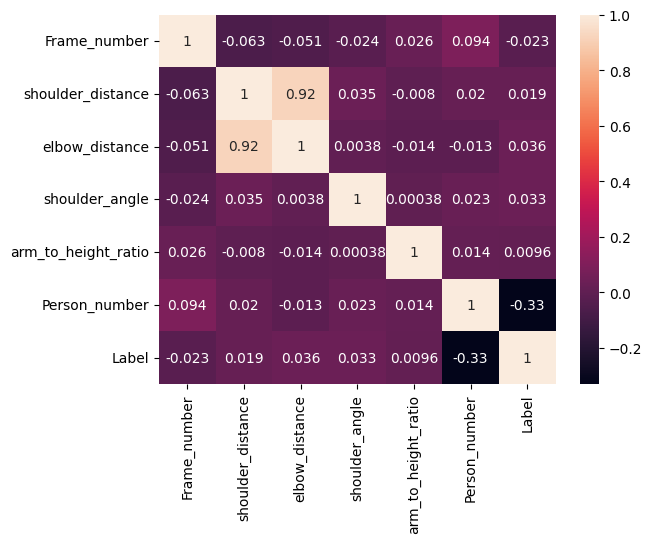

In [ ]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# X=master_df[['Frame_number', 'shoulder_distance', 'elbow_distance', 'shoulder_angle',
#        'arm_to_height_ratio', 'Person_number']]
# Y=master_df["Label"]
X = master_df.drop('Label', axis=1).values
Y = master_df['Label'].values

In [ ]:
num_classes=len(master_df["Label"].unique())
num_classes

9

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1579, 6), (778, 6), (1579,), (778,))

In [ ]:
# y_train

In [ ]:
# Scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape,X_test_scaled.shape

((1579, 6), (778, 6))

In [ ]:
# X_train_scaled_reshaped = np.expand_dims(X_train_scaled, axis=0)
# X_test_scaled_reshaped = np.expand_dims(X_test_scaled, axis=0)
X_train_scaled_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
X_train_scaled_reshaped.shape,X_test_scaled_reshaped.shape

((1579, 1, 6), (778, 1, 6))

In [ ]:
# Reshape data for LSTM (samples, time steps, features)
# num_time_steps = -1  # Adjust this based on the sequence length you want
# X_train_reshaped = X_train_scaled.reshape(1, num_time_steps, X_train_scaled.shape[1])
# X_test_reshaped = X_test_scaled.reshape(1, num_time_steps, X_test_scaled.shape[1])
# X_train_scaled_reshaped.shape,X_test_scaled_reshaped.shape

In [ ]:
# X_train.shape[0], X_train.shape[1]
num_classes

9

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

model = xgb.XGBClassifier(objective='multi:softmax', num_class=9, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9023136246786633


In [ ]:
from sklearn.metrics import classification_report
# classification_report(y_true, y_pred, target_names=target_names)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.25      0.22         4
           1       0.89      0.94      0.91       191
           2       0.67      0.69      0.68        35
           3       0.97      0.95      0.96       382
           4       0.75      0.75      0.75         8
           5       0.83      0.83      0.83        18
           6       0.93      0.86      0.89        29
           7       0.83      0.80      0.82       105
           8       1.00      0.67      0.80         6

    accuracy                           0.90       778
   macro avg       0.78      0.75      0.76       778
weighted avg       0.90      0.90      0.90       778



In [ ]:
X_train_scaled.shape

(1579, 6)

In [ ]:
# Reshape the data to fit the LSTM input shape (samples, timesteps, features)
X_train_lstm = X_train.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_scaled_lstm = X_test.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])
# test_data_lstm = test_data.reshape(test_data.shape[0], 1, test_data.shape[1])

# Define the LSTM model
model = Sequential()
model.add(LSTM(32, return_sequences=True,input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(16))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=100, batch_size=16, validation_data=(X_test_scaled_lstm, y_test))

# Evaluate the model on test data
# loss, accuracy = model.evaluate(test_data_lstm, test_labels)
# print(f"Test loss: {loss}")
# print(f"Test accuracy: {accuracy}")
# Replace the example train_data, test_data, and train_labels with your actual data when applying the code to your use case. Adjust the model architecture, hyperparameters, and other parameters based on your problem and dataset requirements.

# Please note that using an LSTM for tabular data might not be as effective as other algorithms specifically designed for tabular data, such as gradient boosting or neural networks with fully connected layers.







Epoch 1/100
99/99 [==============================] - 6s 17ms/step - loss: -2.4438 - accuracy: 0.2388 - val_loss: -8.2857 - val_accuracy: 0.2455
Epoch 2/100
99/99 [==============================] - 1s 7ms/step - loss: -13.0537 - accuracy: 0.2400 - val_loss: -15.5053 - val_accuracy: 0.2455
Epoch 3/100
99/99 [==============================] - 1s 7ms/step - loss: -18.1588 - accuracy: 0.2400 - val_loss: -19.3438 - val_accuracy: 0.2455
Epoch 4/100
99/99 [==============================] - 1s 7ms/step - loss: -21.8195 - accuracy: 0.2400 - val_loss: -22.6695 - val_accuracy: 0.2455
Epoch 5/100
99/99 [==============================] - 1s 7ms/step - loss: -25.1749 - accuracy: 0.2400 - val_loss: -25.7949 - val_accuracy: 0.2455
Epoch 6/100
99/99 [==============================] - 1s 7ms/step - loss: -28.3956 - accuracy: 0.2400 - val_loss: -28.8537 - val_accuracy: 0.2455
Epoch 7/100
99/99 [==============================] - 1s 7ms/step - loss: -31.5409 - accuracy: 0.2400 - val_loss: -31.8431 - val_acc

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val_lstm, y_val)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {accuracy}")

In [ ]:

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train_scaled, X_test_scaled",X_train_scaled.shape,X_test_scaled.shape)

# Reshape the data for LSTM (samples, timesteps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
print("X_train_lstm, X_test_lstm",X_train_lstm.shape,X_test_lstm.shape)

# Define the LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(3, activation='softmax'))  # 3 classes in the Iris dataset

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=5, batch_size=16, validation_data=(X_test_lstm, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_lstm, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")
# In this example, we load the Iris dataset, split it into train and test sets, and standardize the features using StandardScaler. We then reshape the data to match the input shape of the LSTM model (samples, timesteps, features). The LSTM model is followed by a Dense layer with softmax activation for classification.

# Please note that using an LSTM for the Iris dataset is not a typical or recommended approach, as the Iris dataset doesn't have a sequential or time-series structure. LSTM models are designed for sequences of data over time, such as natural language or sensor data. For the Iris dataset, other machine learning algorithms like random forests, support vector machines, or simple feedforward neural networks would be more appropriate.







(120, 4) (30, 4) (120,) (30,)
X_train_scaled, X_test_scaled (120, 4) (30, 4)
X_train_lstm, X_test_lstm (120, 1, 4) (30, 1, 4)
Epoch 1/5
8/8 [==============================] - 2s 67ms/step - loss: 1.0980 - accuracy: 0.3750 - val_loss: 1.0877 - val_accuracy: 0.3667
Epoch 2/5
8/8 [==============================] - 0s 7ms/step - loss: 1.0668 - accuracy: 0.5500 - val_loss: 1.0560 - val_accuracy: 0.5667
Epoch 3/5
8/8 [==============================] - 0s 7ms/step - loss: 1.0361 - accuracy: 0.6333 - val_loss: 1.0238 - val_accuracy: 0.7667
Epoch 4/5
8/8 [==============================] - 0s 8ms/step - loss: 1.0053 - accuracy: 0.6917 - val_loss: 0.9912 - val_accuracy: 0.8667
Epoch 5/5
1/1 [==============================] - 0s 25ms/step - loss: 0.9578 - accuracy: 0.8667
Test loss: 0.9577603936195374
Test accuracy: 0.8666666746139526
